# Capstone: Fraud Detection

#####     By Mengdie Zhang

### Abstract
Anomaly detection can identify of rare items or suspicions, widely applied for fraud detection, structural defect, medical problems detection, and sensor networks detection. In this project, the real-world transactions data from Vesta will be used to fix with dozens of models to obtain an optimized model with high accuracy and low false fraud prediction, which will not just reduce business fraud loss, but also improve the user experience with low false alerts. 

### Introduction
Anomaly detection is a very important topic in data science, which addresses a variety issues in nowadays industries, such as fraud detection in business, fault detection in manufacturing, medical monitoring in health industry, ecosystem disturbance detection and sensor detection.  

For many business owners, how to protect their company from fraudulent activity is one of the greatest concerns. Whether it be from customers or third-party organisations, a good fraud detection will prevent company loss the money, and make the company can be more trusted. 

To build a model for detecting frauds, we need to find the strange patterns of frauds in the data that are against the norm. Anomaly detection is the study of applying different statistical and machine learning techniques to these areas to identify the suspicions by differing significantly from the majority of data.


In [1]:
# import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from matplotlib import colors
import datetime
import gc
%matplotlib inline

# import preprocessing
from sklearn.preprocessing import LabelEncoder

# import metrics
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc, precision_score, recall_score,roc_auc_score

# import models
from sklearn.model_selection import KFold
import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# lightgbm: https://testlightgbm.readthedocs.io/en/latest/index.html 

/Users/beibei/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


### Environment 
- Python version: 3.7.4 
- Numpy version: 1.16.4
- Pandas version: 0.25.0 
- Seaborn version: 0.9.0 
- Scikit-learn version: 0.21.2 
- Lightgbm version: 2.2.3
- Xgboost version: 0.90  

## Content:

### A) Import Data
### B) Proprocessing
### C) Model Selection
### D) Hyperparameter Optimization
### E) Feature engineering
### F) Results

## A) Import Data
Read the data from the "train_identity.csv" and "train_transaction.csv", and merge these two together as our whole dataset.

In [2]:
# import data from "train_identity.csv"
# Since the data from Kaggle, the data can be downloaded from https://www.kaggle.com/c/ieee-fraud-detection/data
train_identity = pd.read_csv('Capstone/train_identity.csv')
print(f' the shape of this dataframe is {train_identity.shape}')
train_identity.head()

 the shape of this dataframe is (144233, 41)


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [3]:
# import data from "train_transaction.csv"
# Since the data from Kaggle, the data can be downloaded from https://www.kaggle.com/c/ieee-fraud-detection/data
train_transaction = pd.read_csv('Capstone/train_transaction.csv')
print(f' the shape of this dataframe is {train_transaction.shape}')
display(train_transaction.head())

 the shape of this dataframe is (590540, 394)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# merge the all information together
train_df = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)
print(f' the shape of this dataframe is {train_df.shape}')
display(train_df)

 the shape of this dataframe is (590540, 435)


,TransactionID_x,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
5,2987005,0,86510,49.000,W,5937,555.0,150.0,visa,226.0,...,chrome 62.0,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows
6,2987006,0,86522,159.000,W,12308,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.500,W,12695,490.0,150.0,visa,226.0,...,chrome 62.0,32.0,1920x1080,match_status:2,T,F,T,T,mobile,NaN
8,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
9,2987009,0,86536,117.000,W,17399,111.0,150.0,mastercard,224.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


In [5]:
del train_transaction, train_identity
gc.collect()

72

In [6]:
# explore the data by checking each column's unique values
for col, values in train_df.iteritems():
    num_uniques = values.nunique()
    print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
    print (values.unique())
    print ('\n')

TransactionID_x: 590540
[2987000 2987001 2987002 ... 3577537 3577538 3577539]


isFraud: 2
[0 1]


TransactionDT: 573349
[   86400    86401    86469 ... 15811079 15811088 15811131]


TransactionAmt: 20902
[  68.5    29.     59.   ...  557.54 1659.95  400.78]


ProductCD: 5
['W' 'H' 'C' 'S' 'R']


card1: 13553
[13926  2755  4663 ... 13166  8767 18038]


card2: 500
[ nan 404. 490. 567. 514. 555. 360. 100. 111. 352. 375. 418. 303. 314.
 543. 583. 148. 321. 269. 361. 272. 399. 569. 453. 417. 512. 545. 266.
 114. 481. 452. 547. 383. 170. 343. 556. 285. 562. 302. 264. 558. 500.
 396. 103. 206. 143. 243. 476. 199. 174. 423. 446. 492. 523. 440. 528.
 161. 535. 354. 117. 455. 325. 158. 268. 122. 479. 147. 215. 480. 265.
 388. 408. 309. 415. 414. 437. 104. 225. 101. 134. 586. 191. 491. 369.
 322. 494. 532. 313. 474. 324. 475. 298. 429. 432. 553. 566. 599. 296.
 251. 310. 242. 204. 250. 270. 346. 316. 194. 587. 390. 135. 536. 254.
 226. 327. 420. 260. 413. 428. 561. 387. 411. 392. 203. 297. 136. 

C11: 1476
[2.000e+00 1.000e+00 5.000e+00 ... 1.197e+03 1.206e+03 1.210e+03]


C12: 1199
[  0.   2.   1. ... 276. 155. 274.]


C13: 1597
[  1.  25.  12. ... 912. 899. 840.]


C14: 1108
[  1.   2.   3. ... 792. 793. 794.]


D1: 641
[ 14.   0. 112.  61.   1.  72.  46.  62. 485.  66. 169.  29. 121. 245.
 201. 478. 542. 181.  91.   3. 108. 394.  21.   5.  36.  12. 104. 464.
 238. 239.  47. 456. 216.  78.  31. 404.  57.   9.  40. 429. 119.  41.
 250.  56. 416.  37. 369. 157. 164.  10.  59. 248. 453. 457. 125. 217.
   8.  32. 146. 358.  60. 154. 151.  94.  30.  93.  11. 483.  83.  86.
 163. 234. 343.  51. 102. 480. 318. 463. 172. 379. 153. 142. 339. 322.
 127. 303.  48.  64.  22.  79. 257. 213.   6.  27. 107. 265. 117. 462.
 139.  90. 174.  19. 223. 333. 411. 451. 128.  77. 140. 420.   4.  89.
  50. 298.  17. 290. 129.  15. 150. 471. 380. 165.   2. 242. 484. 103.
 320. 479.  26. 291. 305.  92.  23.  58. 424.  70.  42. 368. 352. 256.
  84. 383.  39. 308.  75. 111. 231. 328.  88. 173. 361. 166.

[ nan   0. 537.  35. 216. 163. 398.  24. 338.  18.  55. 242.  42. 318.
  46. 348. 566.   1.  28. 289. 346.  60.   2.  75. 260. 227. 237.  83.
 407.  71. 123. 235. 282.  49.  26. 372. 280. 210. 682. 547. 364.   3.
 240. 303. 320. 360. 330. 103. 122.  23. 182. 141. 365. 366. 155. 315.
 275. 367.  95. 582. 354.  86. 691. 377.  39. 302. 298.   9. 695. 175.
   5.  69.  12.   7.   8. 347.  50. 130. -83.  88. 345.  13. 214.  21.
 655. 299.  82. 657.  41. 567. 363.  14.  27. 215.   4. 281. 169. 209.
 252. 423. 358.  30. 357. 229. 332. 683. 261. 583. 304. 284. 379. 292.
 183. 265. 263. 161. 349.  11. 191. 296. 293.  61. 201. 258. 382. 277.
 295. 212. 294. 344. 326.  48. 323. 335. 107.  78. 413. 540.  10.  96.
 268. 203. 108. 388. 198. 362. 189. 244. 351. 321. 316. 369. 606. 222.
 113. 283. 269.  89. 101. 453. 306. 361.  77. 339. 100. 585. 150. 220.
  65. 160.  64. 301. 243. 238. 158. 119. 176. 276. 511. 371. 328. 121.
 684.  15. 218. 104. 151. 115. 355. 111.  70. 147. 370. 142.  47. 307.
 343. 

[  0. 315. 111.  nan 318. 107.  45.  62. 109.  65.  26. 244. 391. 259.
 121. 245. 290. 477. 541. 389.  22. 289.   2. 406. 458.  20.   5.  35.
  12. 104. 248. 237. 466. 284.  46. 455. 456. 218.  77. 450. 403. 444.
  71.   9.  39. 428. 327.  40. 249. 143. 292. 416.  36. 362. 454.  72.
 479. 120. 426. 247. 453. 457. 124. 335.   7. 145.  14. 100. 413. 232.
 268.  63.  37. 591.  30. 363. 190. 374.  76. 151. 152.  10.  32.  82.
  17. 299. 163. 233.  66.  81.  55. 102. 211. 462. 242. 485. 142. 338.
 321. 125. 127. 302.  48.  93. 137. 304. 421. 330. 471. 212.   6.  27.
 264. 117. 461. 439.  90.  15. 173. 126. 401. 449. 347.  11. 440. 451.
  97. 420.  49. 101. 280. 481. 332. 385.  79. 149. 470. 380. 164.   1.
 204. 483. 319.   8. 394. 309.  43. 480.  92.  58. 438. 448.  69. 350.
  42. 367.  67. 566. 314. 105.  99. 467. 371.  28. 351.  56.  89. 459.
  74. 230. 274.  91. 256. 255. 172. 213.  51.  19. 293. 398. 474. 484.
  18. 475. 167. 160. 346.  29. 473.  60. 222.  44. 388. 201. 312.  59.
 425. 

V66: 8
[ 1. nan  2.  0.  5.  3.  4.  6.  7.]


V67: 9
[ 1. nan  2.  0.  3.  5.  7.  4.  6.  8.]


V68: 3
[ 0. nan  1.  2.]


V69: 6
[ 0. nan  1.  2.  3.  4.  5.]


V70: 7
[ 0. nan  1.  2.  4.  5.  3.  6.]


V71: 7
[ 0. nan  1.  2.  6.  3.  4.  5.]


V72: 11
[ 0. nan  1.  2.  6.  3.  7.  4.  5.  8.  9. 10.]


V73: 8
[ 0. nan  2.  1.  5.  3.  4.  6.  7.]


V74: 9
[ 0. nan  2.  1.  3.  5.  7.  4.  6.  8.]


V75: 5
[ 1.  0. nan  2.  3.  4.]


V76: 7
[ 1.  0. nan  3.  2.  4.  5.  6.]


V77: 31
[ 1. nan  3.  4.  2.  5.  6.  0.  9. 10.  7.  8. 11. 12. 13. 14. 15. 16.
 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]


V78: 32
[ 1. nan  3.  2.  4.  5.  6.  0.  9.  7.  8. 10. 11. 12. 13. 14. 15. 16.
 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.]


V79: 8
[ 0. nan  1.  2.  3.  4.  5.  6.  7.]


V80: 20
[ 0. nan  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 18. 19.]


V81: 20
[ 0. nan  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17

V100: 29
[ 0.  4.  1.  2.  3.  5. 10.  6.  8.  7.  9. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. nan]


V101: 870
[  0.   1.   2.   3.   8.   4.   5.   6.   7.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  nan  23.  24.  25.  26.
  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.
  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.
  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.
  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.
  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.
  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110.
 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124.
 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138.
 139. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152.
 153. 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166.
 167

V113: 10
[ 1.  2.  3.  4.  5.  6.  7.  8.  9.  0. nan]


V114: 7
[ 1.  2.  3.  4.  5.  6.  0. nan]


V115: 7
[ 1.  2.  3.  4.  5.  6.  0. nan]


V116: 7
[ 1.  2.  3.  4.  5.  6.  0. nan]


V117: 4
[ 1.  2.  3.  0. nan]


V118: 4
[ 1.  2.  3.  0. nan]


V119: 4
[ 1.  2.  3.  0. nan]


V120: 4
[ 1.  2.  3.  0. nan]


V121: 4
[ 1.  2.  3.  0. nan]


V122: 4
[ 1.  2.  3.  0. nan]


V123: 14
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.  0. nan]


V124: 14
[ 1.  4.  2.  3.  5.  6.  7.  9.  8. 10. 11. 12. 13.  0. nan]


V125: 14
[ 1.  3.  2.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.  0. nan]


V126: 10299
[   0.           50.          209.94999695 ...   91.47000122 1771.2800293
  279.95001221]


V127: 24414
[ 117.            0.         1758.         ...  481.79000854   91.47000122
 1771.2800293 ]


V128: 14507
[   0.          925.          102.5        ...  125.6651001    91.47000122
 1771.2800293 ]


V129: 1968
[   0.          209.94999695   29.         ... 2422.83007812  799.90002441


V150: 1996
[  nan 1803. 1804. ...   22.   23.   24.]


V151: 56
[nan 49.  1.  4. 50. 51.  2. 52. 53. 54. 48. 47. 46. 45. 44. 43. 42.  3.
 55. 56. 57. 41. 40. 39. 38. 37. 36. 35. 33. 34. 30. 31. 29. 28. 27. 26.
 25.  5.  6. 24. 23. 22. 21. 20. 19. 18. 17. 16. 15. 13. 14. 12. 11.  9.
 10.  8.  7.]


V152: 39
[nan 64.  1.  4.  2.  7.  8.  3. 65. 66. 67. 68.  5.  6. 69. 63. 62. 61.
 60. 59. 57. 55. 54. 53. 51. 52. 50. 49. 56. 58.  9. 10. 11. 12. 13. 14.
 15. 16. 17. 18.]


V153: 19
[nan  0.  1.  6.  2.  3.  4.  5.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 18.]


V154: 19
[nan  0.  1.  7.  2.  8.  3.  4.  5.  6.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 18.]


V155: 25
[nan  0.  1.  2.  7.  3.  4.  5.  6.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 18. 19. 20. 21. 22. 23. 24.]


V156: 25
[nan  0.  1.  2.  8.  9.  3.  4.  5.  6.  7. 10. 11. 12. 13. 14. 15. 16.
 17. 18. 19. 20. 21. 22. 23. 24.]


V157: 25
[nan  0.  1.  2.  7.  3.  4.  5.  6.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 18. 19. 20. 21.

V172: 32
[nan  0.  2.  3.  1.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.]


V173: 8
[nan  0.  1.  2.  3.  4.  5.  6.  7.]


V174: 9
[nan  0.  2.  1.  3.  4.  5.  6.  7.  8.]


V175: 15
[nan  0.  2.  1.  3.  4.  8.  5.  6.  7.  9. 10. 11. 12. 13. 14.]


V176: 49
[nan  1.  4.  5.  6.  2.  3.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 42. 44. 41. 25. 23.
 20. 21. 22. 24. 26. 27. 28. 29. 43. 45. 46. 47. 48.  0.]


V177: 862
[ nan   0.   1.   2.   3.   4.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.   5.   6.  20.  21.  22.  23.  24.  17.  18.  19.  25.  26.
  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.
  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.
  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.
  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.
  83.  84.  85.  86.  87. 

V182: 84
[nan  0.  1.  2.  4.  3.  5.  8.  6. 14.  7. 15. 11. 18. 10. 16. 17.  9.
 19. 12. 13. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 35. 36. 37. 38.
 39. 40. 41. 42. 43. 44. 45. 33. 32. 34. 46. 47. 48. 49. 50. 31. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83.]


V183: 42
[nan  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 11. 13. 14. 10. 12. 15. 16.
 17. 22. 23. 24. 25. 26. 27. 28. 29. 30. 18. 20. 19. 21. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41.]


V184: 17
[nan  0.  1.  2.  3.  4.  7.  5.  6.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


V185: 32
[nan  0.  1.  2.  3.  5.  4.  7.  8.  6.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.]


V186: 39
[nan  1.  2.  4.  5.  3.  6.  7.  8.  9. 10. 11. 12. 13. 14. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 15. 26. 27. 28. 29. 30. 31. 32. 33. 34. 36.
 35. 37. 38.  0.]


V187: 215
[ nan   1.   2.   4.   3.  85.  28.  31.

[ nan   0.   2.   3.   1. 107.   5. 108.  17. 109. 110.   7. 111. 112.
 113.   4.  10. 114. 115.   6.  18.   9.  19.  11.   8.  12.  13.  16.
 142.  20.  14.  21. 116.  43. 117. 118. 119. 120. 121. 122. 123.  22.
  23.  15. 124.  24. 126. 127. 128. 129. 130. 131. 132.  25.  26. 133.
 134. 135. 136. 137. 138. 139. 140. 141. 143.  27. 144.  39.  28.  29.
  30.  31.  32.  34.  33.  35.  36.  37.  41.  52.]


V225: 35
[nan  0.  2.  3.  1. 42. 43. 10. 44. 45.  4. 46. 47.  5. 48. 49. 50.  9.
 51. 32. 40. 37. 38. 39.  6.  7.  8. 41. 11. 12. 13. 14. 15. 16. 17. 19.]


V226: 81
[ nan   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.
 121. 242.  16.  13.  14.  15.  17.  18.  19.  20.  21.  22. 108.  25.
  36.  24.  50.  75.  40.  28.  44.  30.  32.  64. 128. 192.  72.  23.
  26.  27.  29.  31.  33.  34.  35.  37.  38.  39.  41.  42.  43.  45.
  46.  47.  48.  49.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.
  61.  62.  63.  65.  66.  67.  68.  69.  70.  71.  73.  74.]


V227:

V246: 46
[nan  1.  2.  7.  4.  3.  8.  9. 10. 11. 12. 13.  5.  6. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45.  0.]


V247: 19
[nan  1.  6.  4.  2.  7.  8.  9.  5.  3. 10. 11. 12.  0. 13. 14. 15. 16.
 17. 18.]


V248: 23
[nan  1.  2. 35.  4.  3.  7.  5.  6.  8. 36. 33. 34. 13.  9. 10.  0. 11.
 12. 14. 15. 16. 17. 18.]


V249: 23
[nan  1. 21.  4.  3.  2.  7.  5.  8. 22. 20. 19.  6. 16. 17. 18.  0.  9.
 10. 11. 12. 13. 14. 15.]


V250: 19
[nan  1.  0.  2.  6.  3.  4.  8.  5.  7. 10. 13. 11. 16. 12. 17.  9. 14.
 15. 18.]


V251: 19
[nan  1.  0.  2.  7.  8.  3.  4.  6.  5. 11. 10. 13. 16. 12. 17.  9. 14.
 15. 18.]


V252: 25
[nan  1.  7.  4.  2.  8.  9. 10. 11. 12. 13.  3.  5.  6. 14. 15. 16. 17.
 18.  0. 19. 20. 21. 22. 23. 24.]


V253: 66
[ nan   1.   2. 131.   4.   3.   5. 132. 133. 134.   8. 135.   7. 136.
 137.   9. 138. 139.   6.  61.  62.  10. 140. 141. 142.  32. 143. 144.
 146. 147.  18. 148. 149. 

[1.000e+00 4.000e+00 2.000e+00 3.000e+00 5.000e+00 6.000e+00 7.000e+00
 8.000e+00 9.000e+00 1.000e+01 8.730e+02 8.740e+02 1.100e+01 1.200e+01
 1.300e+01 1.400e+01 8.620e+02 8.540e+02 8.530e+02 2.200e+01 1.500e+01
 1.600e+01 1.700e+01 2.400e+01 2.500e+01 2.600e+01 2.700e+01 1.800e+01
 3.300e+01 2.800e+01 2.300e+01 1.900e+01 2.000e+01 2.900e+01 8.250e+02
 3.000e+01 8.270e+02       nan 3.100e+01 8.480e+02 7.860e+02 7.870e+02
 7.890e+02 7.900e+02 7.950e+02 7.960e+02 8.030e+02 8.050e+02 8.070e+02
 8.230e+02 8.360e+02 8.310e+02 7.780e+02 7.800e+02 8.100e+02 8.300e+02
 8.320e+02 8.680e+02 2.100e+01 9.080e+02 9.370e+02 9.410e+02 9.040e+02
 9.060e+02 9.330e+02 9.720e+02 1.044e+03 1.043e+03 1.040e+03 1.055e+03
 1.049e+03 1.047e+03 1.034e+03 1.030e+03 1.031e+03 1.035e+03 1.037e+03
 1.038e+03 1.039e+03 1.048e+03 1.050e+03 1.052e+03 1.046e+03 9.360e+02
 8.900e+02 8.870e+02 8.570e+02 8.260e+02 7.490e+02 7.510e+02 7.520e+02
 7.530e+02 7.540e+02 7.580e+02 7.620e+02 7.640e+02 7.720e+02 7.590e+02
 6.930

V307: 37367
[ 117.            0.         1758.         ...  731.40002441  548.83197021
  812.77001953]


V308: 23064
[  0.         925.         166.21539307 ... 731.40002441 266.8999939
 548.83197021]


V309: 4236
[  0.          90.32790375  29.         ...  29.61219978 919.
  48.84479904]


V310: 19136
[  0.         354.          90.32790375 ... 351.6499939  481.79000854
 188.86999512]


V311: 3098
[  0.          31.84129906  29.         ...  29.61219978 167.
  48.84479904]


V312: 8068
[   0.          135.           90.32790375 ...  366.76000977 1105.
   48.84479904]


V313: 5529
[  0.          90.32790375  29.         ...  48.84479904 612.
 481.79000854]


V314: 11377
[  0.         495.          90.32790375 ...  48.84479904 481.79000854
 188.86999512]


V315: 6973
[  0.          90.32790375  29.         ...  48.84479904 612.
 481.79000854]


V316: 9814
[  0.          50.         200.         ... 585.11999512 643.63201904
 488.76599121]


V317: 15184
[ 117.            0.         1404

[   nan     0.   145. ...  9500. 25600. 29200.]


V333: 1971
[   nan     0.    25. ... 11600. 16000. 19600.]


V334: 143
[        nan 0.00000e+00 3.50000e+01 6.00000e+00 5.00000e+01 3.00000e+01
 1.50000e+02 5.00000e+00 7.00000e+00 1.00000e+02 1.00000e+01 2.50000e+01
 2.00000e+01 1.25000e+02 5.50000e+01 1.50000e+01 4.00000e+01 8.00000e+00
 7.00000e+01 7.50000e+01 5.00000e+02 6.00000e+01 2.00000e+02 4.00000e+02
 2.50000e+02 9.50000e+01 6.50000e+01 1.55000e+02 2.70000e+01 9.00000e+01
 1.00000e+03 4.50000e+01 3.00000e+02 1.10000e+02 8.00000e+01 8.50000e+01
 9.00000e+02 6.50000e+02 1.30000e+01 3.50000e+02 2.75000e+02 1.80000e+01
 9.75000e+02 2.25000e+02 6.00000e+02 1.75000e+02 2.00000e+03 3.00000e+03
 3.25000e+02 7.50000e+00 7.50000e+02 1.25000e+03 3.30000e+01 1.40000e+03
 4.50000e+02 8.50000e+02 7.00000e+02 9.25000e+02 1.65000e+02 2.50000e+03
 3.10000e+03 3.75000e+02 4.25000e+02 1.24000e+02 1.35000e+03 9.50000e+02
 8.00000e+02 1.45000e+03 1.80000e+03 2.40000e+03 2.60000e+03 1.50000e+03
 2.

[ nan   0.   1.   3.   2.   9.  12.   6.   4.  21.   7.   5.  18.  17.
  -1.  11.   8.  10. -10.  -8.  40.  13.  19.  -3.  14.  22.  -4.  15.
  23.  24.  -2.  41.  20.  -5.  31.  50.  -9.  25.  27.  -7.  33. -26.
 -11.  26.  32.  42.  29.  -6.  16. -21. -12. -16.  28.  34. -30.  30.
  39. -28.  38. -27.  37. -13. -15. -14. -18.  52.  35. -17. -23. -25.
  48. -20. -31.  36. -19.  47. -34. -24.  43.  46.  45.  44. -33. -22.
 -29. -72. -37. -35. -44. -40. -32. -46. -38. -39.]


id_06: 101
[  nan   -5.    0.   -6.  -10.  -11.   -1.   -4.  -43.   -9.  -44.  -33.
  -29.   -8.  -81.  -13.  -24.  -17.  -32. -100.  -25.  -49.  -12.  -22.
  -56.  -14.   -2.  -27.  -20.  -26.  -36.   -7.  -19.  -34.  -30.  -72.
  -21.  -41.  -48.  -16.  -39.   -3.  -31.  -78.  -35.  -45.  -47.  -28.
  -18.  -50.  -23.  -15.  -46.  -38.  -55.  -67.  -42.  -40.  -98.  -37.
  -63.  -60.  -51.  -57.  -66.  -62.  -59.  -52.  -64.  -82.  -97.  -58.
  -53.  -75.  -69.  -61.  -54.  -84.  -90.  -71.  -85.  -80.  -68.  -73

[nan 'Found' 'NotFound']


id_28: 2
['New' 'Found' nan]


id_29: 2
['NotFound' 'Found' nan]


id_30: 75
['Android 7.0' 'iOS 11.1.2' nan 'Mac OS X 10_11_6' 'Windows 10' 'Android'
 'Linux' 'iOS 11.0.3' 'Mac OS X 10_7_5' 'Mac OS X 10_12_6'
 'Mac OS X 10_13_1' 'iOS 11.1.0' 'Mac OS X 10_9_5' 'Windows 7'
 'Windows 8.1' 'Mac' 'iOS 10.3.3' 'Mac OS X 10.12' 'Mac OS X 10_10_5'
 'Mac OS X 10_11_5' 'iOS 9.3.5' 'Android 5.1.1' 'Android 7.1.1'
 'Android 6.0' 'iOS 10.3.1' 'Mac OS X 10.9' 'iOS 11.1.1' 'Windows Vista'
 'iOS 10.3.2' 'iOS 11.0.2' 'Mac OS X 10.11' 'Android 8.0.0' 'iOS 10.2.0'
 'iOS 10.2.1' 'iOS 11.0.0' 'Mac OS X 10.10' 'Mac OS X 10_12_3'
 'Mac OS X 10_12' 'Android 6.0.1' 'iOS' 'Mac OS X 10.13'
 'Mac OS X 10_12_5' 'Mac OS X 10_8_5' 'iOS 11.0.1' 'iOS 10.0.2'
 'Android 5.0.2' 'Windows XP' 'iOS 11.2.0' 'Mac OS X 10.6' 'Windows 8'
 'Mac OS X 10_6_8' 'Mac OS X 10_11_4' 'Mac OS X 10_12_1' 'iOS 10.1.1'
 'Mac OS X 10_11_3' 'Mac OS X 10_12_4' 'Mac OS X 10_13_2' 'Android 4.4.2'
 'Mac OS X 10_12_2' '

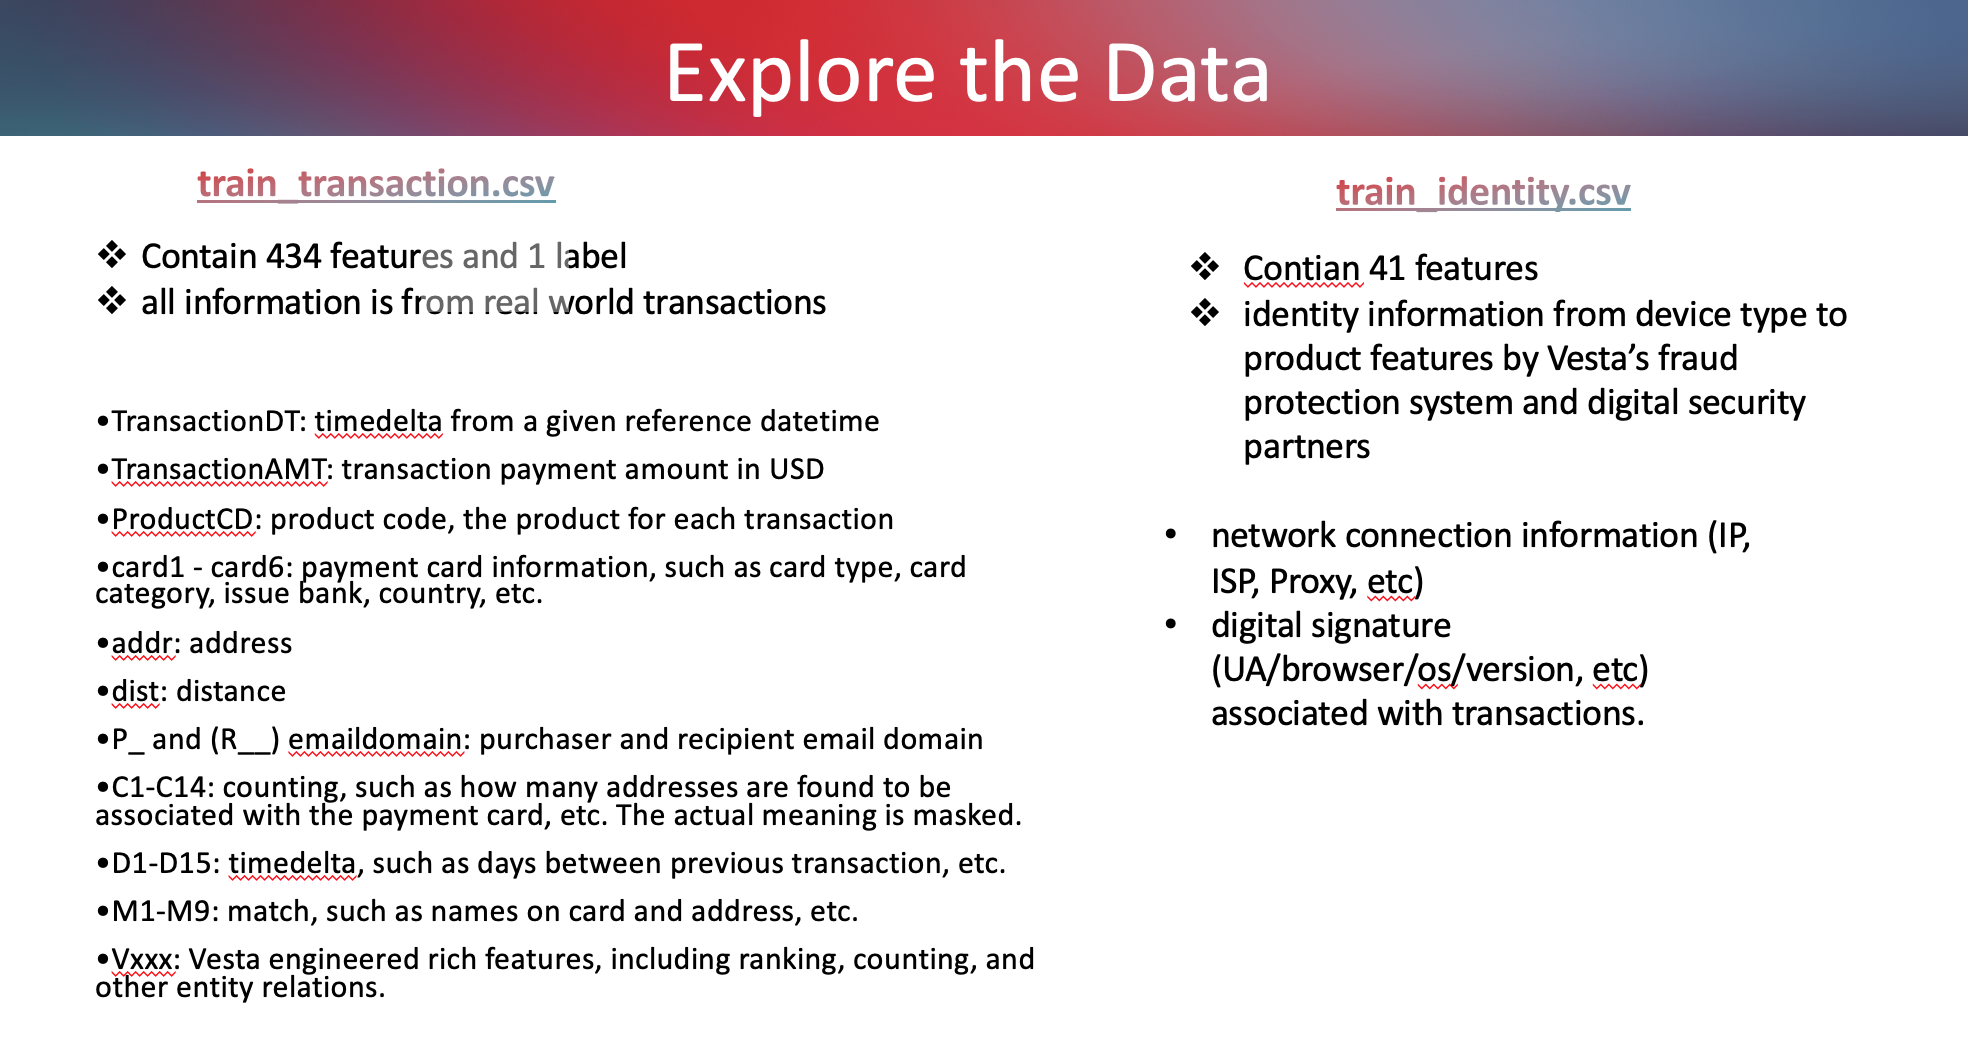

## B) Preprocessing

Since my first choice of the model is Lightbgm which can compatible with the NaN values, in this part, the NaN values will not be dealt with.

In [7]:
# data wrangling
# since the column "DeviceInfo" has 1786 values, many of them are duplicated
# seperate the verstion with the platform

def feature_cleaning(dataframe):
    
    # the column containing the information of device name and version, such as 'SAMSUNG SM-G892A Build/NRD90M'
    # thus, split the column
    dataframe['device_name'] = dataframe['DeviceInfo'].str.split('/', expand=True)[0]
    dataframe['device_version'] = dataframe['DeviceInfo'].str.split('/', expand=True)[1]
    
    # the column containing the information of system name and version, such as "Android 7.0"
    # thus, split the column
    dataframe['system_name'] = dataframe['id_30'].str.split(' ', expand=True)[0]
    dataframe['system_version'] = dataframe['id_30'].str.split(' ', expand=True)[1]
    
    # the column containing the information of browser name and version(may include platform), such as 'firefox 57.0'
    # thus, split the column
    dataframe['browser_name'] = dataframe['id_31'].str.split(' ', expand=True)[0]
    dataframe['browser_version'] = dataframe['id_31'].str.split(' ', expand=True)[1]
    
    # seperate the column of "id_33" which is the resolution with two values, such as '960x640'
    dataframe['screen_width'] = dataframe['id_33'].str.split('x', expand=True)[0]
    dataframe['screen_height'] = dataframe['id_33'].str.split('x', expand=True)[1]
    
    # only the last number describing the difference of "match_status", such as 'match_status:1' 
    dataframe['id_34'] = dataframe['id_34'].str.split(':', expand=True)[1]
    
    # only the last string describing the difference of "IP_PROXY", such as'IP_PROXY:TRANSPARENT'
    dataframe['id_23'] = dataframe['id_23'].str.split(':', expand=True)[1]

    # Wrangle the information of device name 
    dataframe.loc[dataframe['device_name'].str.contains('SM', na=False), 'device_name'] = 'Samsung'
    dataframe.loc[dataframe['device_name'].str.contains('SAMSUNG', na=False), 'device_name'] = 'Samsung'
    dataframe.loc[dataframe['device_name'].str.contains('GT-', na=False), 'device_name'] = 'Samsung'
    dataframe.loc[dataframe['device_name'].str.contains('Moto G', na=False), 'device_name'] = 'Motorola'
    dataframe.loc[dataframe['device_name'].str.contains('Moto', na=False), 'device_name'] = 'Motorola'
    dataframe.loc[dataframe['device_name'].str.contains('moto', na=False), 'device_name'] = 'Motorola'
    dataframe.loc[dataframe['device_name'].str.contains('LG-', na=False), 'device_name'] = 'LG'
    dataframe.loc[dataframe['device_name'].str.contains('rv:', na=False), 'device_name'] = 'RV'
    dataframe.loc[dataframe['device_name'].str.contains('HUAWEI', na=False), 'device_name'] = 'Huawei'
    dataframe.loc[dataframe['device_name'].str.contains('ALE-', na=False), 'device_name'] = 'Huawei'
    dataframe.loc[dataframe['device_name'].str.contains('-L', na=False), 'device_name'] = 'Huawei'
    dataframe.loc[dataframe['device_name'].str.contains('Blade', na=False), 'device_name'] = 'ZTE'
    dataframe.loc[dataframe['device_name'].str.contains('BLADE', na=False), 'device_name'] = 'ZTE'
    dataframe.loc[dataframe['device_name'].str.contains('Linux', na=False), 'device_name'] = 'Linux'
    dataframe.loc[dataframe['device_name'].str.contains('XT', na=False), 'device_name'] = 'Sony'
    dataframe.loc[dataframe['device_name'].str.contains('HTC', na=False), 'device_name'] = 'HTC'
    dataframe.loc[dataframe['device_name'].str.contains('ASUS', na=False), 'device_name'] = 'Asus'
    
    # The device name changes into "others" if the count of device name is less than 200
    dataframe.loc[dataframe.device_name.isin(dataframe.device_name.value_counts()[dataframe.device_name.value_counts() < 200].index), 'device_name'] = "Others"
    
    gc.collect()
    
    return dataframe

In [8]:
train_df = feature_cleaning(train_df)

In [9]:
# Checking the unique values for each column : one unique value features and too many unique value features
one_value_cols = [col for col in train_df.columns if train_df[col].nunique() <= 1]
toomany_value_cols = [col for col in train_df.columns if train_df[col].nunique() >= (0.5*train_df.shape[0])]
print(f'There are {len(one_value_cols)} columns with only one unique value.')
print(f'There are {len(toomany_value_cols)} columns with more than 50% of samples unique values')

There are 0 columns with only one unique value.
There are 2 columns with more than 50% of samples unique values


In [10]:
# Checking the features with too many classifier
# Since the toomuny_value_cols are not categorical columns 
# keep these two features
display(toomany_value_cols)

['TransactionID_x', 'TransactionDT']

In [11]:
# Checking missing data
def Checking_NaN(data):
    number = data.isnull().sum()
    percent = (data.isnull().sum()/data.shape[0]*100)
    results = pd.concat([number, percent], axis=1, keys=['Number', 'Percent'])
    data_types = []
    for col in data.columns:
        data_type = str(data[col].dtype)
        data_types.append(data_type)
    results['Data_types'] = data_types
    return(np.transpose(results))

In [12]:
# Checking the missing values in train_df
missing_data = Checking_NaN(train_df)
display(missing_data)

,TransactionID_x,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,DeviceType,DeviceInfo,device_name,device_version,system_name,system_version,browser_name,browser_version,screen_width,screen_height
Number,0,0,0,0,0,0,8933,1565,1577,4259,...,449730,471874,471874,558898,512975,515795,450258,452313,517251,517251
Percent,0,0,0,0,0,0,1.51268,0.265012,0.267044,0.721204,...,76.1557,79.9055,79.9055,94.6419,86.8654,87.3429,76.2451,76.5931,87.5895,87.5895
Data_types,int64,int64,int64,float64,object,int64,float64,float64,object,float64,...,object,object,object,object,object,object,object,object,object,object


In [13]:
# checking the how many kinds of data types in all columns
col_dtypes = missing_data.loc["Data_types"].value_counts()
display(col_dtypes)

float64    400
object      39
int64        4
Name: Data_types, dtype: int64

In [14]:
# define the function to find uesless features
def useless_features(Nan_percent,df):
    useless_list = []
    for col in df.columns:
        if df[col]["Percent"] > Nan_percent:
            useless_list.append(col)
    return useless_list

In [15]:
# drop the features with more than 90% of missing data
drop_cols_list = useless_features(90,missing_data)

train_df = train_df.drop(drop_cols_list, axis=1)

## Prepare for modeling

Since some models can deal with missing values and some cannot, so we need to deal with missing values to create a new dataframe.
new_train_df will be the dataset replaced the missing values with -999 or mean
- the dataset for models what cannot deal with missing values will use new_train_df.
- the dataset for models what can deal with missing values will use train_df.

#### Dataset for models can deal with missing values (Lightbgm) 

In [16]:
%%time
#Modles is not compatible with “Object” type with pandas DataFrame, 
#so need to encode to “int, float or bool” by using LabelEncoder
#LableEncoder can avoid the error for string datatype

for col in train_df.columns:
    if train_df[col].dtype == 'object':
        le = LabelEncoder()
        le.fit(list(train_df[col].astype(str).values))
        train_df[col] = le.transform(list(train_df[col].astype(str).values))

CPU times: user 50.6 s, sys: 1.72 s, total: 52.3 s
Wall time: 35.6 s


In [17]:
#Due to the error of "Did not expect the data types in fields TransactionDT"
X = train_df.sort_values('TransactionDT').drop(['isFraud', 'TransactionDT'], axis=1)
y = train_df.sort_values('TransactionDT')['isFraud']

X_new, X_test, y_new, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

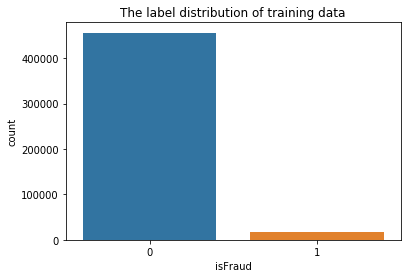

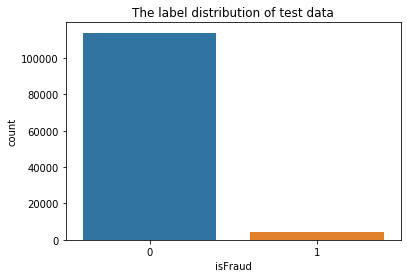

In [18]:
sns.countplot(x=y_new)
plt.title("The label distribution of training data")
plt.show()

sns.countplot(x=y_test)
plt.title("The label distribution of test data")
plt.show()

#### Dataset for models cannot deal with missing values (Logistic regression, Xgboost)) 

In [19]:
# fill the NaN with " " in the columns of the "object" data type 
new_train_df =  train_df.copy()
obj_cols = new_train_df.select_dtypes(include=['object']).columns

new_train_df.loc[:, obj_cols] = new_train_df.loc[:, obj_cols].fillna('-999')

In [20]:
# find the columns with many uique values
cols_list = [col for col in new_train_df.columns if new_train_df[col].nunique() >= (0.1*new_train_df.shape[0])]
print(f'There are {len(cols_list)} columns with more than 1% of samples unique values')
print(cols_list)

There are 4 columns with more than 1% of samples unique values
['TransactionID_x', 'TransactionDT', 'TransactionID_y', 'id_02']


In [21]:
for col in cols_list:
    result = new_train_df[col].isnull().sum()
    print(f'the column {col} has {result} missing values')

the column TransactionID_x has 0 missing values
the column TransactionDT has 0 missing values
the column TransactionID_y has 446307 missing values
the column id_02 has 449668 missing values


In [22]:
# Since the 2 columns with more than 1% of samples unique values seems like categorical data,
# fill the NaN with -999 in all columns
new_train_df = new_train_df.fillna(-999)

In [23]:
# Create inspect_file function to check whether there are null values in each column
def inspect_dataframe(dfname):
    print("Any missing values? "+str(dfname.isna().any().any()))
    if dfname.isna().any().any()== True:
        print("Since there is NaN in this dataframe, the result of each column's missing values checking is showing as follows: ")
        print(dfname.isna().any())
    print()

In [24]:
# check the columns with null values 
inspect_dataframe(new_train_df)

Any missing values? False



In [25]:
# deal with the string features
# find the columns with the data type is object
def nan_object(df):
    mylist = []
    for col in df.columns:
        if df[col]["Data_types"]=="object":
            mylist.append(col)
    return mylist

object_cols_list = nan_object(missing_data)

obj_df = new_train_df[new_train_df.columns.intersection(object_cols_list)]

for col, values in obj_df.iteritems():
    num_uniques = values.nunique()
    print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
    print (values.unique())
    print ('\n')

ProductCD: 5
[4 1 0 3 2]


card4: 5
[1 2 4 0 3]


card6: 5
[1 2 4 3 0]


P_emaildomain: 60
[32 16 36 54 29  1 19 49  2 30  9 35 10  8 43 38 12 23 26 15 25  3 24 59
 44  4 31 41 55  6 46 11 21  7 42 34 17 47 14 51 13 37 28 33  0 50 48  5
 58 56 57 45 40 27 53 22 20 18 39 52]


R_emaildomain: 61
[32 16 19 36  1  8 38  9 26 23 55  2 24  3 50 56  4 47 60 21 31 35 25 17
  0 29 30 37 10 11 12 51 44 46 28 49 42 59 57 58 14 15 27 41 54 52 48 22
 40 20 13  7 18 33 34 53 43  6 39  5 45]


M1: 3
[1 2 0]


M2: 3
[1 2 0]


M3: 3
[1 2 0]


M4: 4
[2 0 3 1]


M5: 3
[0 1 2]


M6: 3
[1 0 2]


M7: 3
[2 0 1]


M8: 3
[2 0 1]


M9: 3
[2 0 1]


id_12: 3
[1 0 2]


id_15: 4
[1 0 3 2]


id_16: 3
[1 0 2]


id_28: 3
[1 0 2]


id_29: 3
[1 0 2]


id_30: 76
[ 7 63 74 24 42  0 12 60 38 31 32 61 40 43 45 13 56 16 20 23 73  4  8  5
 54 19 62 46 55 59 15 10 52 53 57 14 28 25  6 49 17 30 39 58 50  3 47 64
 18 44 37 22 26 51 21 29 33  1 27  2 48  9 11 75 34 65 67 41 66 69 68 35
 36 71 70 72]


id_31: 131
[124  98  44 103 

In [26]:
# drop the column with duplicated information or too many unique values
drop_cols = ["id_33", "system_version", "browser_version","DeviceInfo"]
new_train_df = new_train_df.drop(drop_cols, axis=1)

In [27]:
%%time
#LableEncoder can avoid the error for string datatype

for col in new_train_df.columns:
    if new_train_df[col].dtype == 'object':
        le = LabelEncoder()
        le.fit(list(new_train_df[col].astype(str).values))
        new_train_df[col] = le.transform(list(new_train_df[col].astype(str).values))

CPU times: user 15.5 ms, sys: 1.1 ms, total: 16.7 ms
Wall time: 16.3 ms


In [28]:
y2 = new_train_df.loc[:,"isFraud"]
X2 = new_train_df.copy
X2 = new_train_df.drop("isFraud", axis =1)

In [29]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state = 42)

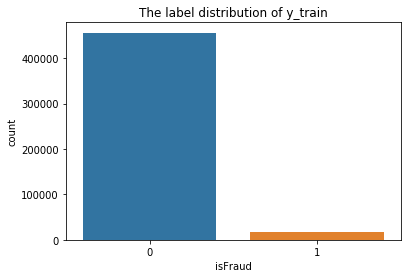

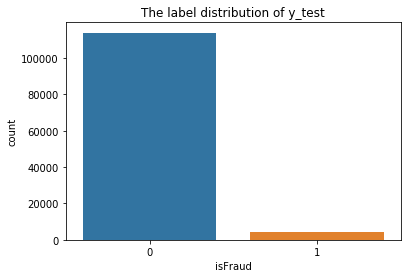

In [30]:
sns.countplot(x=y2_train)
plt.title("The label distribution of y_train")
plt.show()

sns.countplot(x=y2_test)
plt.title("The label distribution of y_test")
plt.show()

## C)Model Selection
- Logistic Regression
- Xgboost
- Lightbgm

### Logistic Regression

In [31]:
logit = LogisticRegression(solver = "lbfgs")
logit.fit(X2_train, y2_train)

train_score = logit.score(X2_train, y2_train)
test_score = logit.score(X2_test, y2_test)

print(f'accuary score for training data is: {train_score}')
print(f'accuary score for test data is: {test_score}')

/Users/beibei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


accuary score for training data is: 0.9652182747993362
accuary score for test data is: 0.9640413858502388


In [32]:
y_pred = logit.predict(X2_test)

logitmatrix = confusion_matrix(y2_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y2_test, y_pred).ravel()

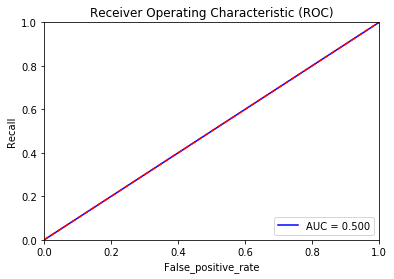

In [33]:
#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y2_test, y_pred)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('False_positive_rate')
plt.show()

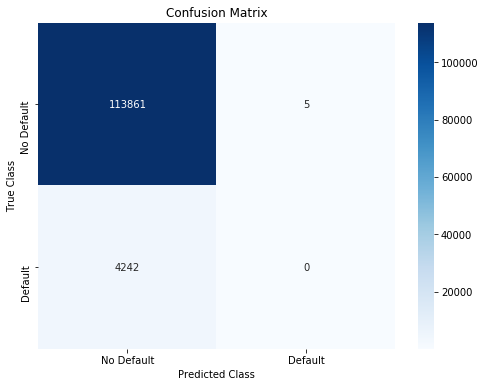

In [34]:
#plot the confustion matrix using sns
cm = confusion_matrix(y2_test, y_pred.round())
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [35]:
fpr = (fp/(fp+tn))
precision = precision_score(y_test, y_pred.round())
print(f'False_positive_rate: {fpr}')
print(f'Precision(positive predictive value):{precision}')

False_positive_rate: 4.391126411747141e-05
Precision(positive predictive value):0.0


### Xgboost

In [36]:
params = {'objective': 'binary:logistic',
          'eval_metric': "auc",
          'verbose': -1,
          'random_state':47}

In [37]:
%%time

n_folds = 3
folds = KFold(n_splits=n_folds)

columns = X2_train.columns
splits = folds.split(X2_train, y2_train)
y_preds = np.zeros(X2_test.shape[0])
y_oof = np.zeros(X2_train.shape[0])
score = 0

from sklearn.metrics import roc_auc_score
for fold_n, (train_index, valid_index) in enumerate(splits):
    
    X_train, X_valid = X2_train.iloc[train_index], X2_train.iloc[valid_index]
    y_train, y_valid = y2_train.iloc[train_index], y2_train.iloc[valid_index]
    
    dtrain = xgb.DMatrix(X_train, label=y_train, missing=-999)
    dvalid = xgb.DMatrix(X_valid, label=y_valid, missing=-999)

    evals=[(dtrain,'train'),(dvalid,'valid')]

    xgbclf = xgb.train(params, dtrain, evals=evals, early_stopping_rounds=10)
    
    y_pred_valid = xgbclf.predict(xgb.DMatrix(X_valid))
    
    print(f"Fold {fold_n + 1} | AUC: {roc_auc_score(y_valid, y_pred_valid)}")
    
    score += roc_auc_score(y_valid, y_pred_valid) / n_folds
    y_preds += xgbclf.predict(xgb.DMatrix(X2_test)) / n_folds
    
    del X_train, X_valid, y_train, y_valid
    gc.collect()
    
print(f"\nMean AUC = {score}")

/Users/beibei/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-auc:0.785334	valid-auc:0.787624
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 10 rounds.
[1]	train-auc:0.809316	valid-auc:0.814362
[2]	train-auc:0.816749	valid-auc:0.821122
[3]	train-auc:0.821769	valid-auc:0.825403
[4]	train-auc:0.846478	valid-auc:0.84889
[5]	train-auc:0.851003	valid-auc:0.852031
[6]	train-auc:0.864418	valid-auc:0.862293
[7]	train-auc:0.870339	valid-auc:0.86699
[8]	train-auc:0.87647	valid-auc:0.872792
[9]	train-auc:0.881398	valid-auc:0.877492
Fold 1 | AUC: 0.8604607936022508


/Users/beibei/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-auc:0.779931	valid-auc:0.782851
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 10 rounds.
[1]	train-auc:0.810533	valid-auc:0.811618
[2]	train-auc:0.817041	valid-auc:0.816942
[3]	train-auc:0.819533	valid-auc:0.819549
[4]	train-auc:0.849075	valid-auc:0.848258
[5]	train-auc:0.853375	valid-auc:0.852501
[6]	train-auc:0.854834	valid-auc:0.8535
[7]	train-auc:0.869784	valid-auc:0.865606
[8]	train-auc:0.8791	valid-auc:0.876062
[9]	train-auc:0.883572	valid-auc:0.879475
Fold 2 | AUC: 0.8603663979603227


/Users/beibei/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-auc:0.78032	valid-auc:0.771148
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 10 rounds.
[1]	train-auc:0.813098	valid-auc:0.802459
[2]	train-auc:0.820655	valid-auc:0.809134
[3]	train-auc:0.826683	valid-auc:0.815032
[4]	train-auc:0.829671	valid-auc:0.817614
[5]	train-auc:0.854336	valid-auc:0.845636
[6]	train-auc:0.861123	valid-auc:0.853549
[7]	train-auc:0.868937	valid-auc:0.858793
[8]	train-auc:0.873486	valid-auc:0.863239
[9]	train-auc:0.885335	valid-auc:0.873521
Fold 3 | AUC: 0.8596374763290914

Mean AUC = 0.8601548892972215
CPU times: user 5min 32s, sys: 37.7 s, total: 6min 10s
Wall time: 6min 15s


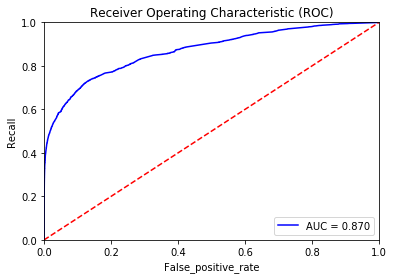

In [38]:
#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y2_test, y_preds)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('False_positive_rate')
plt.show()

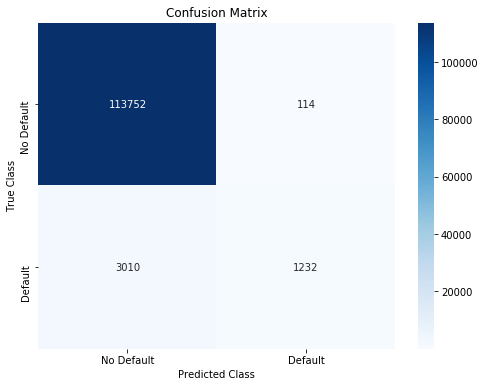

In [39]:
#Print Confusion Matrix
#Set threshold=0.5
cm = confusion_matrix(y2_test, y_preds.round())
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [40]:
#Set threshold=0.5confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y2_test, y_preds.round()).ravel()
fpr = (fp/(fp+tn))
precision = precision_score(y2_test, y_preds.round())
print(f'False_positive_rate: {fpr}')
print(f'Precision(positive predictive value):{precision}')

False_positive_rate: 0.0010011768218783483
Precision(positive predictive value):0.9153046062407132


### LightBgm

In [41]:
#Due to the error of "Did not expect the data types in fields TransactionDT"
X = train_df.sort_values('TransactionDT').drop(['isFraud', 'TransactionDT'], axis=1)
y = train_df.sort_values('TransactionDT')['isFraud']

X_new, X_test, y_new, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [42]:
params = {'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric': "auc",
          'max_depth': -1,
          'verbose': -1,
          'random_state':47}

In [43]:
%%time

n_folds = 3
folds = KFold(n_splits=n_folds)

columns = X_new.columns
splits = folds.split(X_new, y_new)
y_preds = np.zeros(X_test.shape[0])
y_oof = np.zeros(X_new.shape[0])
score = 0

feature_importances = pd.DataFrame()
feature_importances['feature'] = columns
  
for fold_n, (train_index, valid_index) in enumerate(splits):
    X_train, X_valid = X_new[columns].iloc[train_index], X_new[columns].iloc[valid_index]
    y_train, y_valid = y_new.iloc[train_index], y_new.iloc[valid_index]
    
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_valid, label=y_valid)

    clf = lgb.train(params, dtrain, valid_sets = [dtrain, dvalid], early_stopping_rounds=10)
    
    feature_importances[f'fold_{fold_n + 1}'] = clf.feature_importance()
    
    y_pred_valid = clf.predict(X_valid)
    y_oof[valid_index] = y_pred_valid
    print(f"Fold {fold_n + 1} | AUC: {roc_auc_score(y_valid, y_pred_valid)}")
    
    score += roc_auc_score(y_valid, y_pred_valid) / n_folds
    y_preds += clf.predict(X_test) / n_folds
    
    del X_train, X_valid, y_train, y_valid
    gc.collect()
    
print(f"\nMean AUC = {score}")

[1]	training's auc: 0.80092	valid_1's auc: 0.803703
Training until validation scores don't improve for 10 rounds.
[2]	training's auc: 0.851367	valid_1's auc: 0.85234
[3]	training's auc: 0.856982	valid_1's auc: 0.856883
[4]	training's auc: 0.8599	valid_1's auc: 0.859658
[5]	training's auc: 0.863345	valid_1's auc: 0.862312
[6]	training's auc: 0.868488	valid_1's auc: 0.86711
[7]	training's auc: 0.871301	valid_1's auc: 0.869873
[8]	training's auc: 0.873164	valid_1's auc: 0.872037
[9]	training's auc: 0.875172	valid_1's auc: 0.873307
[10]	training's auc: 0.877095	valid_1's auc: 0.875597
[11]	training's auc: 0.879363	valid_1's auc: 0.877467
[12]	training's auc: 0.88137	valid_1's auc: 0.878865
[13]	training's auc: 0.882754	valid_1's auc: 0.880291
[14]	training's auc: 0.883881	valid_1's auc: 0.881244
[15]	training's auc: 0.885327	valid_1's auc: 0.882438
[16]	training's auc: 0.887927	valid_1's auc: 0.885419
[17]	training's auc: 0.890128	valid_1's auc: 0.887268
[18]	training's auc: 0.892355	valid

[49]	training's auc: 0.923388	valid_1's auc: 0.913201
[50]	training's auc: 0.92434	valid_1's auc: 0.913554
[51]	training's auc: 0.925446	valid_1's auc: 0.914636
[52]	training's auc: 0.925928	valid_1's auc: 0.914935
[53]	training's auc: 0.926902	valid_1's auc: 0.915518
[54]	training's auc: 0.927346	valid_1's auc: 0.915705
[55]	training's auc: 0.927775	valid_1's auc: 0.916007
[56]	training's auc: 0.928532	valid_1's auc: 0.916825
[57]	training's auc: 0.929501	valid_1's auc: 0.917332
[58]	training's auc: 0.93002	valid_1's auc: 0.917673
[59]	training's auc: 0.930643	valid_1's auc: 0.918
[60]	training's auc: 0.931128	valid_1's auc: 0.918433
[61]	training's auc: 0.931952	valid_1's auc: 0.919002
[62]	training's auc: 0.932539	valid_1's auc: 0.919382
[63]	training's auc: 0.932974	valid_1's auc: 0.919734
[64]	training's auc: 0.933353	valid_1's auc: 0.919947
[65]	training's auc: 0.933838	valid_1's auc: 0.920113
[66]	training's auc: 0.934216	valid_1's auc: 0.920393
[67]	training's auc: 0.934508	val

[98]	training's auc: 0.950875	valid_1's auc: 0.922899
[99]	training's auc: 0.951341	valid_1's auc: 0.923308
[100]	training's auc: 0.951549	valid_1's auc: 0.923368
Did not meet early stopping. Best iteration is:
[100]	training's auc: 0.951549	valid_1's auc: 0.923368
Fold 3 | AUC: 0.923367687593667

Mean AUC = 0.9262421419588156
CPU times: user 7min 54s, sys: 54.4 s, total: 8min 49s
Wall time: 3min 26s


In [44]:
#fit the model with test dataset
y_pred = clf.predict(X_test)

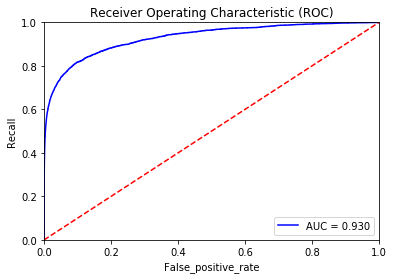

In [45]:
#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('False_positive_rate')
plt.show()

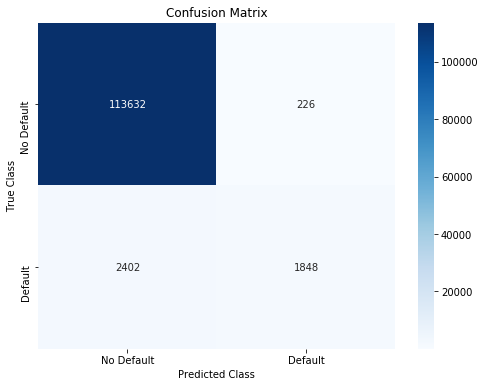

In [46]:
#Print Confusion Matrix
#Set threshold=0.5
cm = confusion_matrix(y_test, y_pred.round())
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [47]:
#Set threshold=0.5confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred.round()).ravel()
fpr = (fp/(fp+tn))
precision = precision_score(y_test, y_pred.round())
print(f'False_positive_rate: {fpr}')
print(f'Precision(positive predictive value):{precision}')

False_positive_rate: 0.00198492859526779
Precision(positive predictive value):0.8910318225650916


#### Decision of model seletion:
Logistic regression is a common model for binary classification with a fast computation time. But the AUC score is 0.5, just like a random guess. Furthermore, the true positive is 0, which means this model doesn't find any true fraud.

XGBoost is a very popular gredient boosting method with a decent AUC score as 0.87. While the computation time is pretty long for this computer, thus another model will be tried.

LightGBM v1 is released in 2017 developed by Microsoft. This method using leaf-wise tree brings the advantages of faster speed and better accuracy. The average valid AUC score is 0.93 with above much faster speed than XGBoost.

LightGBM is chosen, since it's much faster with better AUC score.
The next step is feature engineering.

## D) Hyperparameter Optimization
Try to use GridsearchCV, RandomizedSearchCV to find the optimized hyperparameters, while using these methods with Lightgbm caused the extremely long running time, which made the computer keep crashing.
Since the time limitation of this project, I just try to find the optimized value for some important parameters one by one.

To reduce the running time, the early_stopping_round was set to 5.

### "num_leaves": 
Max number of leaves in one tree. Usually increase the value of "num_leaves" may improve the accuracy. Default =  31.

In [48]:
dtrain = lgb.Dataset(X_new, label=y_new)

cv_auc_mean = []
cv_auc_stdv = []

num_leaves_list = [31, 200, 400, 500]

for i in num_leaves_list:
    
    params ={"num_leaves":i,
     'boosting_type': 'gbdt',
     'objective': 'binary',
     'metric': 'binary',
     'max_depth': -1,
     'verbose': -1,
     'random_state':47}

    val_summary = lgb.cv(params, dtrain, nfold=3, metrics="auc", early_stopping_rounds=5)
    temp_auc_mean = np.mean(val_summary['auc-mean'][-3:])
    temp_auc_stdv = np.mean(val_summary['auc-stdv'][-3:]) 
    cv_auc_mean.append(temp_auc_mean)    
    cv_auc_stdv.append(temp_auc_stdv)
    print(f'when num_leaves is:{i} | the auc_mean:{temp_auc_mean} | the auc_stdv:{temp_auc_stdv}')

when num_leaves is:31 | the auc_mean:0.9271460667259798 | the auc_stdv:0.003933722798408868
when num_leaves is:200 | the auc_mean:0.9522962099744393 | the auc_stdv:0.002199090724017198
when num_leaves is:400 | the auc_mean:0.9572872659815302 | the auc_stdv:0.0014469226942960438
when num_leaves is:500 | the auc_mean:0.9579121461311474 | the auc_stdv:0.0023415483623708193


When "num_leaves" equals to 500, the auc_mean is highest, but the auc_stdv is bigger than what in "num_leaves" of 400. So the value of 400 and 500 are also considerable. The value of num_leaves was set to 400 and 500 respectively, then following parameter selection cells were run for checking which one has a higher auc_mean. It found that set num_leaves as 500, the auc_mean will be higher. So in this project, the parameter of "num_leaves" is set as 500.

### 'min_data_in_leaf':
Minimal number of data in one leaf. Can be used to deal with over-fitting. Default =20.

In [49]:
cv_auc_mean = []
cv_auc_stdv = []

min_data_in_leaf_list = [15, 20, 50, 100, 200]

for i in min_data_in_leaf_list:
    
    params ={"num_leaves":500,
             "min_data_in_leaf":i,
             'boosting_type': 'gbdt',
             'objective': 'binary',
             'metric': 'binary',
             'max_depth': -1,
             'verbose': -1,
             'random_state':47}

    val_summary = lgb.cv(params, dtrain, nfold=3, metrics="auc", early_stopping_rounds=5)
    temp_auc_mean = np.mean(val_summary['auc-mean'][-3:])
    temp_auc_stdv = np.mean(val_summary['auc-stdv'][-3:]) 
    cv_auc_mean.append(temp_auc_mean)    
    cv_auc_stdv.append(temp_auc_stdv)
    print(f'when min_data_in_leaf is:{i} | the auc_mean:{temp_auc_mean} | the auc_stdv:{temp_auc_stdv}')

when min_data_in_leaf is:15 | the auc_mean:0.9583608908374188 | the auc_stdv:0.0016961573704491898
when min_data_in_leaf is:20 | the auc_mean:0.9579121461311474 | the auc_stdv:0.0023415483623708193
when min_data_in_leaf is:50 | the auc_mean:0.9588500572671715 | the auc_stdv:0.0011781247172713933
when min_data_in_leaf is:100 | the auc_mean:0.9587443167866527 | the auc_stdv:0.001365740917293925
when min_data_in_leaf is:200 | the auc_mean:0.9572479438903935 | the auc_stdv:0.0018620713438685162


When "min_data_in_leaf" equals to 50, the auc_mean is the highest, and the auc_stdv is low. Thus, the parameter of "min_data_in_leaf" is set to 50.

### 'learning_rate':
also called shrinkage. The effect of using it is that learning is slowed down, in turn requiring more trees to be added to the ensemble. This gives the model a regularisation effect. Usually smaller learning_rate will bring better accuracy. Default = 0.1

In [50]:
cv_auc_mean = []
cv_auc_stdv = []

learning_rate_list = [0.2, 0.1, 0.05, 0.01]

for i in learning_rate_list:
    
    params ={"num_leaves":500,
             "min_data_in_leaf": 50,
             "learning_rate": i,
             'boosting_type': 'gbdt',
             'objective': 'binary',
             'metric': 'binary',
             'max_depth': -1,
             'verbose': -1,
             'random_state':47}

    val_summary = lgb.cv(params, dtrain, nfold=3, metrics="auc", early_stopping_rounds=5)
    temp_auc_mean = np.mean(val_summary['auc-mean'][-3:])
    temp_auc_stdv = np.mean(val_summary['auc-stdv'][-3:]) 
    cv_auc_mean.append(temp_auc_mean)    
    cv_auc_stdv.append(temp_auc_stdv)
    
    print(f'when learning_rate is:{i} | the auc_mean:{temp_auc_mean} | the auc_stdv:{temp_auc_stdv}')

when learning_rate is:0.2 | the auc_mean:0.956647808878238 | the auc_stdv:0.0015669580952808009
when learning_rate is:0.1 | the auc_mean:0.9588500572671715 | the auc_stdv:0.0011781247172713933
when learning_rate is:0.05 | the auc_mean:0.9546788671088479 | the auc_stdv:0.0015592557055427259
when learning_rate is:0.01 | the auc_mean:0.9165693916887921 | the auc_stdv:0.0031941819143877555


When "learning_rate" equals to 0.1, the auc_mean is the highest, and the auc_stdv is low. Thus, the parameter of "min_data_in_leaf" is set to 0.1.

### "feature_fraction":
0.7 feature fraction means LightGBM will select 70% of parameters randomly in each iteration for building trees. Default = 1.

In [51]:
cv_auc_mean = []
cv_auc_stdv = []

feature_fraction_list = [1, 0.8, 0.7, 0.6]

for i in feature_fraction_list:
    
    params ={"num_leaves":500,
             "min_data_in_leaf": 50,
             "learning_rate": 0.1,
             "feature_fraction": i,
             'boosting_type': 'gbdt',
             'objective': 'binary',
             'metric': 'binary',
             'max_depth': -1,
             'verbose': -1,
             'random_state':47}

    val_summary = lgb.cv(params, dtrain, nfold=3, metrics="auc", early_stopping_rounds=5)
    temp_auc_mean = np.mean(val_summary['auc-mean'][-3:])
    temp_auc_stdv = np.mean(val_summary['auc-stdv'][-3:]) 
    cv_auc_mean.append(temp_auc_mean)    
    cv_auc_stdv.append(temp_auc_stdv)
    
    print(f'when feature_fraction is:{i} | the auc_mean:{temp_auc_mean} | the auc_stdv:{temp_auc_stdv}')

when feature_fraction is:1 | the auc_mean:0.9588500572671715 | the auc_stdv:0.0011781247172713933
when feature_fraction is:0.8 | the auc_mean:0.9586356864758364 | the auc_stdv:0.0018963808308322602
when feature_fraction is:0.7 | the auc_mean:0.9585373750116378 | the auc_stdv:0.0011257019590676352
when feature_fraction is:0.6 | the auc_mean:0.9582638562888036 | the auc_stdv:0.0014144858430130433


When "feature_fraction" equals to 1, the auc_mean is the highest, and the auc_stdv is low. Thus, the parameter of "feature_fraction" is set to 1.

### re-fit the data to the model with optimized parameters

In [52]:
params ={"num_leaves":500,   
         "min_data_in_leaf": 50,
         "learning_rate": 0.1,
         "feature_fraction": 1,             
         'boosting_type': 'gbdt',
         'objective': 'binary',
         'metric': 'auc',
         'max_depth': -1,
         'verbose': -1,
         'random_state':47}

In [53]:
%%time

n_folds = 3
folds = KFold(n_splits=n_folds)

columns = X_new.columns
splits = folds.split(X_new, y_new)
y_preds = np.zeros(X_test.shape[0])
y_oof = np.zeros(X_new.shape[0])
score = 0

feature_importances = pd.DataFrame()
feature_importances['feature'] = columns
  
for fold_n, (train_index, valid_index) in enumerate(splits):
    X_train, X_valid = X_new[columns].iloc[train_index], X_new[columns].iloc[valid_index]
    y_train, y_valid = y_new.iloc[train_index], y_new.iloc[valid_index]
    
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_valid, label=y_valid)

    clf = lgb.train(params, dtrain, valid_sets = [dtrain, dvalid], early_stopping_rounds=10)
    
    feature_importances[f'fold_{fold_n + 1}'] = clf.feature_importance()
    
    y_pred_valid = clf.predict(X_valid)
    y_oof[valid_index] = y_pred_valid
    print(f"Fold {fold_n + 1} | AUC: {roc_auc_score(y_valid, y_pred_valid)}")
    
    score += roc_auc_score(y_valid, y_pred_valid) / n_folds
    y_preds += clf.predict(X_test) / n_folds
    
    del X_train, X_valid, y_train, y_valid
    gc.collect()
    
print(f"\nMean AUC = {score}")

[1]	training's auc: 0.89695	valid_1's auc: 0.872238
Training until validation scores don't improve for 10 rounds.
[2]	training's auc: 0.908162	valid_1's auc: 0.886756
[3]	training's auc: 0.913463	valid_1's auc: 0.891854
[4]	training's auc: 0.919715	valid_1's auc: 0.896295
[5]	training's auc: 0.923572	valid_1's auc: 0.899692
[6]	training's auc: 0.927302	valid_1's auc: 0.901932
[7]	training's auc: 0.935532	valid_1's auc: 0.908161
[8]	training's auc: 0.939924	valid_1's auc: 0.90965
[9]	training's auc: 0.942303	valid_1's auc: 0.911542
[10]	training's auc: 0.945793	valid_1's auc: 0.914535
[11]	training's auc: 0.947789	valid_1's auc: 0.916216
[12]	training's auc: 0.950757	valid_1's auc: 0.917621
[13]	training's auc: 0.953325	valid_1's auc: 0.919175
[14]	training's auc: 0.955027	valid_1's auc: 0.920946
[15]	training's auc: 0.95763	valid_1's auc: 0.921804
[16]	training's auc: 0.960202	valid_1's auc: 0.923489
[17]	training's auc: 0.961965	valid_1's auc: 0.924565
[18]	training's auc: 0.965513	va

[49]	training's auc: 0.997942	valid_1's auc: 0.95526
[50]	training's auc: 0.998099	valid_1's auc: 0.955463
[51]	training's auc: 0.998254	valid_1's auc: 0.955779
[52]	training's auc: 0.998332	valid_1's auc: 0.956239
[53]	training's auc: 0.998508	valid_1's auc: 0.956449
[54]	training's auc: 0.998642	valid_1's auc: 0.956656
[55]	training's auc: 0.998754	valid_1's auc: 0.956989
[56]	training's auc: 0.998854	valid_1's auc: 0.957081
[57]	training's auc: 0.998909	valid_1's auc: 0.957127
[58]	training's auc: 0.999005	valid_1's auc: 0.957161
[59]	training's auc: 0.99905	valid_1's auc: 0.957294
[60]	training's auc: 0.999131	valid_1's auc: 0.957392
[61]	training's auc: 0.999211	valid_1's auc: 0.957408
[62]	training's auc: 0.999305	valid_1's auc: 0.95758
[63]	training's auc: 0.999339	valid_1's auc: 0.957816
[64]	training's auc: 0.999383	valid_1's auc: 0.958005
[65]	training's auc: 0.999411	valid_1's auc: 0.958177
[66]	training's auc: 0.999473	valid_1's auc: 0.958288
[67]	training's auc: 0.999523	v

[98]	training's auc: 0.999962	valid_1's auc: 0.956396
[99]	training's auc: 0.999966	valid_1's auc: 0.956432
[100]	training's auc: 0.999969	valid_1's auc: 0.956538
Did not meet early stopping. Best iteration is:
[100]	training's auc: 0.999969	valid_1's auc: 0.956538
Fold 3 | AUC: 0.9565376738474306

Mean AUC = 0.9595977943364297
CPU times: user 22min 44s, sys: 1min, total: 23min 45s
Wall time: 7min 25s


Text(0.5, 1.0, 'the Top 50 important features over 3 folds average with improved model')

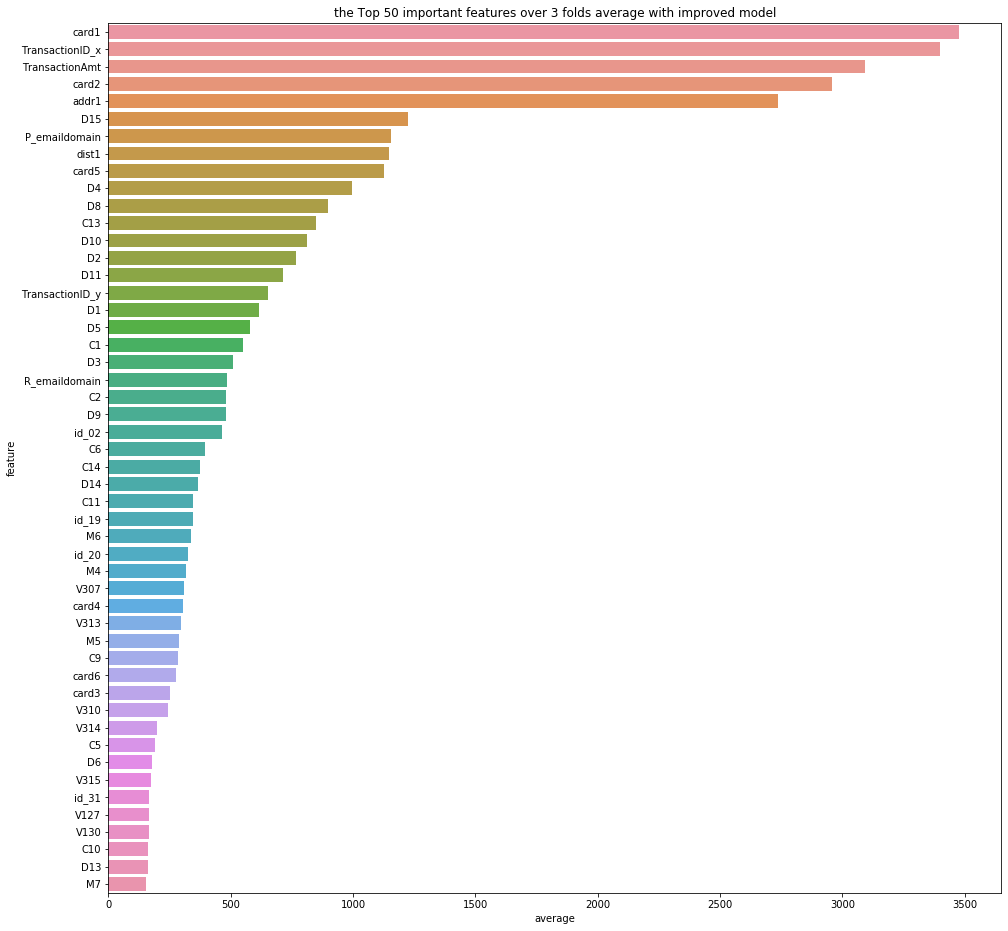

In [54]:
feature_importances['average'] = feature_importances[[f'fold_{fold_n + 1}' for fold_n in range(folds.n_splits)]].mean(axis=1)
feature_importances.to_csv('feature_importances.csv')

plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature');
plt.title(f'the Top 50 important features over {n_folds} folds average with improved model')

In [55]:
#fit the model with test dataset
y_pred = clf.predict(X_test)

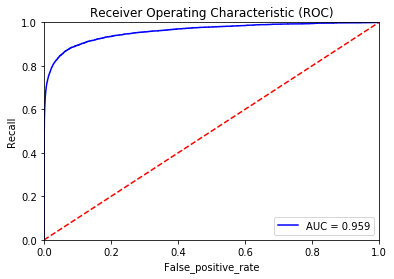

In [56]:
#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('False_positive_rate')
plt.show()

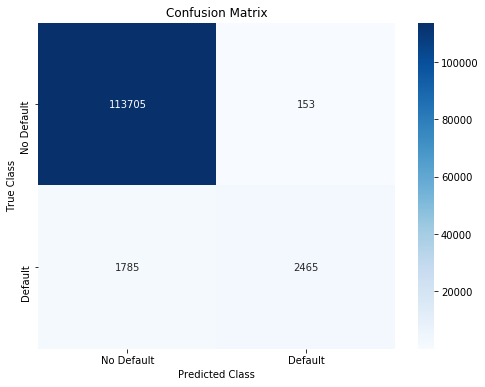

In [57]:
#Print Confusion Matrix
#Set threshold=0.5
cm = confusion_matrix(y_test, y_pred.round())
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [58]:
#Set threshold=0.5confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred.round()).ravel()
fpr = (fp/(fp+tn))
precision = precision_score(y_test, y_pred.round())
print(f'False_positive_rate: {fpr}')
print(f'Precision(positive predictive value):{precision}')

False_positive_rate: 0.0013437790932565126
Precision(positive predictive value):0.9415584415584416


Results: the optimized parameters improved the performance of this model.
After fitting with test data
- AUC score achieved 0.959 from 0.93
- Precision score increased to 0.932 from 0.891
- Fpr dropped to 0.00156 from 0.00198

## E) Feature Engineering

- Timeline: Add new features as “year”, “month”, ” dow”, “ hour”, “ day”
- Email: Add new features as “P_emaildomain_suffix”, “R_emaildomain_suffix”
- Gaussian distribution: Adding new feature as “TransactionAmt_Log”

### 1) Build the features about timeline 

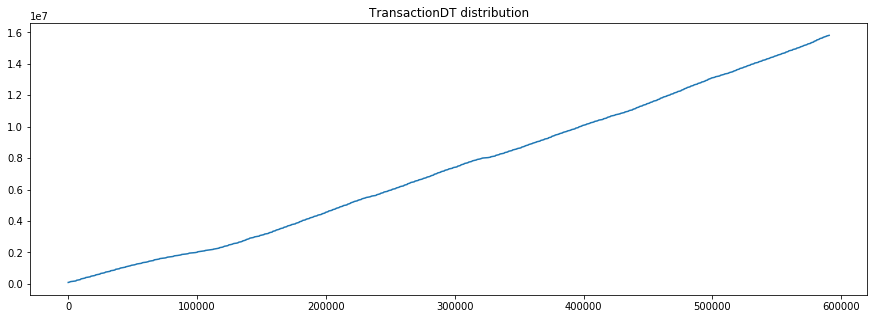

the first value of this feature is: 86400
the last value of this feature is: 15811131


In [59]:
plt.figure(figsize = (15,5))
plt.plot(train_df.index.values, train_df['TransactionDT'])
plt.title('TransactionDT distribution')
plt.show()

temp_list = train_df['TransactionDT']
len_list = len(temp_list)
print(f'the first value of this feature is: {temp_list[0]}')
print(f'the last value of this feature is: {temp_list[len_list-1]}')

The column of "TransactionDT" is timedelta. The first value is 86400, which corresponds to the number of seconds in a day (60 * 60 * 24 = 86400) so the unit may be seconds. Using this to double check, we know the data lasts 6 months, as the last value is 15811131, which would correspond to 183 (15811131/86400)day.
Use this information, we need to built the new feaures about timeline
source: https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203#latest-610341 

In [60]:
# Processing the Time series of transactions and the card_id information
def define_timeline(df):
    
    # create date column
    START_DATE = '2017-12-01'
    startdate = datetime.datetime.strptime(START_DATE, '%Y-%m-%d')
    df['TransactionDT'] = df['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))
    
    #create the features of the description of the time of transcation happened
    df['year'] = df['TransactionDT'].dt.year
    df['month'] = df['TransactionDT'].dt.month
    df['dow'] = df['TransactionDT'].dt.dayofweek
    df['hour'] = df['TransactionDT'].dt.hour
    df['day'] = df['TransactionDT'].dt.day

    return df

In [61]:
fe_train_df = define_timeline(train_df)

### 2) Build the feature about the transactionAmt and Email

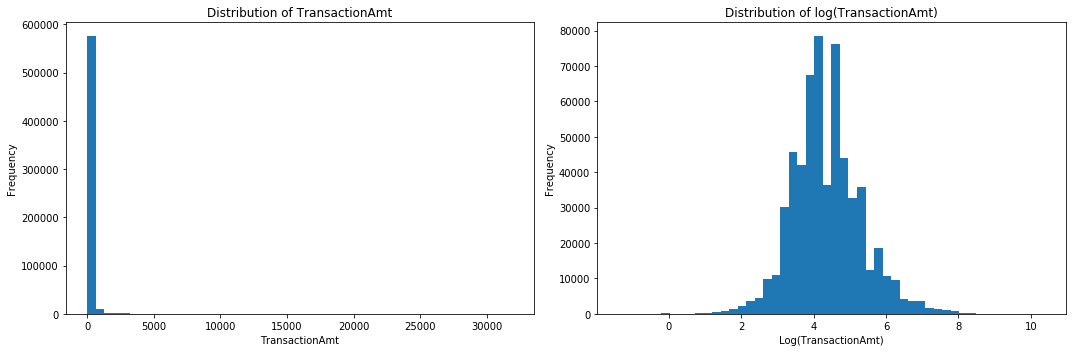

In [62]:
# explore the data of "TransactionAmt"
# the feature with a gaussian distribution will be useful for the model, Thus we log the data 
# source: https://www.ritchieng.com/machine-learning-anomaly-detection/ 

amt = fe_train_df["TransactionAmt"]

plt.figure(figsize= (15,5))

plt.subplot(1,2,1)
plt.hist(amt,bins = 50)
plt.title("Distribution of TransactionAmt")
plt.xlabel("TransactionAmt")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(np.log(amt),bins = 50)
plt.title("Distribution of log(TransactionAmt)")
plt.xlabel("Log(TransactionAmt)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [63]:
# explore the data of email_domain
# some of the emals' suffix refers to country, which may have significant influence to the model
temp_1 = pd.DataFrame(fe_train_df["P_emaildomain"].value_counts())
temp_2 = pd.DataFrame(fe_train_df["R_emaildomain"].value_counts())
temp = temp_1.join(temp_2, how = "outer")
temp = temp.fillna(0)
temp = temp.astype('int64') 
display(temp)

,P_emaildomain,R_emaildomain
0,315,36
1,36998,20529
2,28289,3701
3,4033,430
4,1909,422
5,159,27
6,205,12
7,172,37
8,816,127
9,7888,1812


In [64]:
def suffix_gaussian_FE(df): 
    
    # New feature - log of transaction amount. ()
    df['TransactionAmt_Log'] = np.log(df['TransactionAmt'])
        
    #emals' suffix may refer to country or weird emails, thus split the feature
    for c in ['P_emaildomain', 'R_emaildomain']:
        df[c + '_suffix'] = df[c].map(lambda x: str(x).split('.')[-1])

    return df

In [65]:
fe_train_df = suffix_gaussian_FE(fe_train_df)

In [66]:
%%time
#LightGBM is not compatible with “Object” type with pandas DataFrame, 
#so need to encode to “int, float or bool” by using LabelEncoder
#LableEncoder can avoid the error for LightBGM for string datatype

for col in fe_train_df.columns:
    if fe_train_df[col].dtype == 'object':
        le = LabelEncoder()
        le.fit(list(fe_train_df[col].astype(str).values))
        fe_train_df[col] = le.transform(list(fe_train_df[col].astype(str).values))


CPU times: user 1.67 s, sys: 38 ms, total: 1.7 s
Wall time: 1e+03 ms


In [67]:
# pandas is friedly to NaN, but numpy is not
# But with NaN values, the running time for corr is very long. In np, it will be faster.
Corr = fe_train_df[fe_train_df.columns[1:]].corr()['isFraud'][:]
Corr = pd.DataFrame(Corr)

In [68]:
Corr = Corr.sort_values(by = "isFraud", ascending = False)
display(Corr)

,isFraud
isFraud,1.000000
V257,0.383060
V246,0.366878
V244,0.364129
V242,0.360590
V201,0.328005
V200,0.318783
V189,0.308219
V188,0.303582
V258,0.297151


Text(0.5, 0, 'Correlation Score')

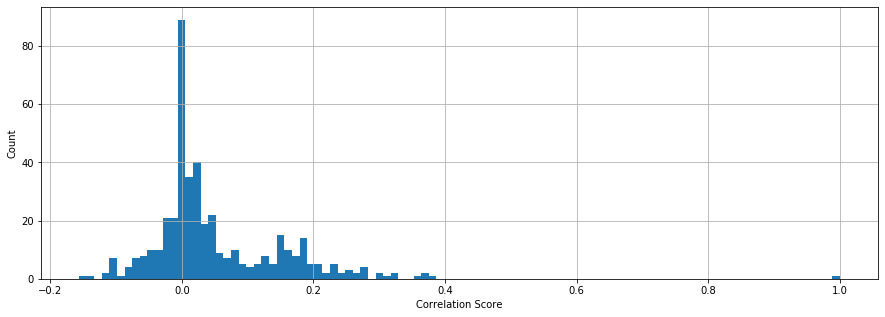

In [69]:
# visualize the coeffience between the features and label
Corr.isFraud.hist(figsize=(15,5), bins = 100)
plt.ylabel('Count')
plt.xlabel('Correlation Score')

In [70]:
#list top 50 abosulte value of correlation coefficients.
corr_selected = Corr[abs(Corr['isFraud'])>= 0.1]
print(corr_selected.isFraud.abs().sort_values(ascending=False).head(50))

isFraud    1.000000
V257       0.383060
V246       0.366878
V244       0.364129
V242       0.360590
V201       0.328005
V200       0.318783
V189       0.308219
V188       0.303582
V258       0.297151
V45        0.281832
V158       0.278066
V156       0.275952
V149       0.273282
V228       0.268861
V44        0.260376
V86        0.251828
V87        0.251737
V170       0.249794
V147       0.242894
V52        0.239469
V157       0.234866
V155       0.234199
V230       0.231740
V199       0.231024
V148       0.228891
V51        0.223191
V171       0.216508
V40        0.212442
V243       0.210238
V154       0.206958
V190       0.205148
V39        0.203097
V38        0.199005
V146       0.198584
V43        0.198274
V140       0.196938
V79        0.194141
V42        0.189428
V94        0.188407
V74        0.185915
V33        0.183486
V153       0.183114
V17        0.182673
V18        0.182550
V81        0.182377
V93        0.180983
V92        0.180513
V34        0.180301
V80        0.180299


### Refit the Modeling: LightGBM

#### After the first feature engineering to fit the Lightgbm model

In [71]:
#Due to the error of "Did not expect the data types in fields TransactionDT"
X = fe_train_df.sort_values('TransactionDT').drop(['isFraud', 'TransactionDT'], axis=1)
y = fe_train_df.sort_values('TransactionDT')['isFraud']

X_new, X_test, y_new, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

#### Model result & Important features after 1st feature engineering

In [72]:
params ={"num_leaves":500,   
         "min_data_in_leaf": 50,
         "learning_rate": 0.1,
         "feature_fraction": 1,             
         'boosting_type': 'gbdt',
         'objective': 'binary',
         'metric': 'auc',
         'max_depth': -1,
         'verbose': -1,
         'random_state':47}

In [73]:
%%time

n_folds = 3
folds = KFold(n_splits=n_folds)

columns = X_new.columns
splits = folds.split(X_new, y_new)
y_preds = np.zeros(X_test.shape[0])
y_oof = np.zeros(X_new.shape[0])
score = 0

feature_importances = pd.DataFrame()
feature_importances['feature'] = columns
  
for fold_n, (train_index, valid_index) in enumerate(splits):
    X_train, X_valid = X_new[columns].iloc[train_index], X_new[columns].iloc[valid_index]
    y_train, y_valid = y_new.iloc[train_index], y_new.iloc[valid_index]
    
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_valid, label=y_valid)

    clf = lgb.train(params, dtrain, valid_sets = [dtrain, dvalid], early_stopping_rounds=10)
    
    feature_importances[f'fold_{fold_n + 1}'] = clf.feature_importance()
    
    y_pred_valid = clf.predict(X_valid)
    y_oof[valid_index] = y_pred_valid
    print(f"Fold {fold_n + 1} | AUC: {roc_auc_score(y_valid, y_pred_valid)}")
    
    score += roc_auc_score(y_valid, y_pred_valid) / n_folds
    y_preds += clf.predict(X_test) / n_folds
    
    del X_train, X_valid, y_train, y_valid
    gc.collect()
    
print(f"\nMean AUC = {score}")

[1]	training's auc: 0.89766	valid_1's auc: 0.871389
Training until validation scores don't improve for 10 rounds.
[2]	training's auc: 0.907571	valid_1's auc: 0.884907
[3]	training's auc: 0.915092	valid_1's auc: 0.892182
[4]	training's auc: 0.920516	valid_1's auc: 0.896867
[5]	training's auc: 0.923963	valid_1's auc: 0.899777
[6]	training's auc: 0.927138	valid_1's auc: 0.901688
[7]	training's auc: 0.935997	valid_1's auc: 0.908239
[8]	training's auc: 0.939451	valid_1's auc: 0.909777
[9]	training's auc: 0.943441	valid_1's auc: 0.912183
[10]	training's auc: 0.945711	valid_1's auc: 0.913692
[11]	training's auc: 0.947621	valid_1's auc: 0.915604
[12]	training's auc: 0.950405	valid_1's auc: 0.916824
[13]	training's auc: 0.95276	valid_1's auc: 0.91797
[14]	training's auc: 0.95582	valid_1's auc: 0.920562
[15]	training's auc: 0.957964	valid_1's auc: 0.922869
[16]	training's auc: 0.960347	valid_1's auc: 0.923569
[17]	training's auc: 0.962298	valid_1's auc: 0.924481
[18]	training's auc: 0.964895	val

[49]	training's auc: 0.998427	valid_1's auc: 0.953944
[50]	training's auc: 0.998619	valid_1's auc: 0.954048
[51]	training's auc: 0.998763	valid_1's auc: 0.954442
[52]	training's auc: 0.998881	valid_1's auc: 0.954816
[53]	training's auc: 0.998996	valid_1's auc: 0.955027
[54]	training's auc: 0.999074	valid_1's auc: 0.955292
[55]	training's auc: 0.999159	valid_1's auc: 0.955415
[56]	training's auc: 0.999262	valid_1's auc: 0.955595
[57]	training's auc: 0.999332	valid_1's auc: 0.955743
[58]	training's auc: 0.999399	valid_1's auc: 0.956037
[59]	training's auc: 0.999428	valid_1's auc: 0.956359
[60]	training's auc: 0.999481	valid_1's auc: 0.95653
[61]	training's auc: 0.999513	valid_1's auc: 0.956692
[62]	training's auc: 0.999545	valid_1's auc: 0.956706
[63]	training's auc: 0.999599	valid_1's auc: 0.956737
[64]	training's auc: 0.999615	valid_1's auc: 0.957031
[65]	training's auc: 0.999662	valid_1's auc: 0.95693
[66]	training's auc: 0.9997	valid_1's auc: 0.957068
[67]	training's auc: 0.999743	va

[98]	training's auc: 0.999991	valid_1's auc: 0.955816
[99]	training's auc: 0.999993	valid_1's auc: 0.955821
[100]	training's auc: 0.999993	valid_1's auc: 0.955853
Did not meet early stopping. Best iteration is:
[100]	training's auc: 0.999993	valid_1's auc: 0.955853
Fold 3 | AUC: 0.9558534210502762

Mean AUC = 0.9588854822252231
CPU times: user 23min 28s, sys: 1min 5s, total: 24min 34s
Wall time: 7min 39s


Text(0.5, 1.0, 'the Top 50 important features over 3 folds average')

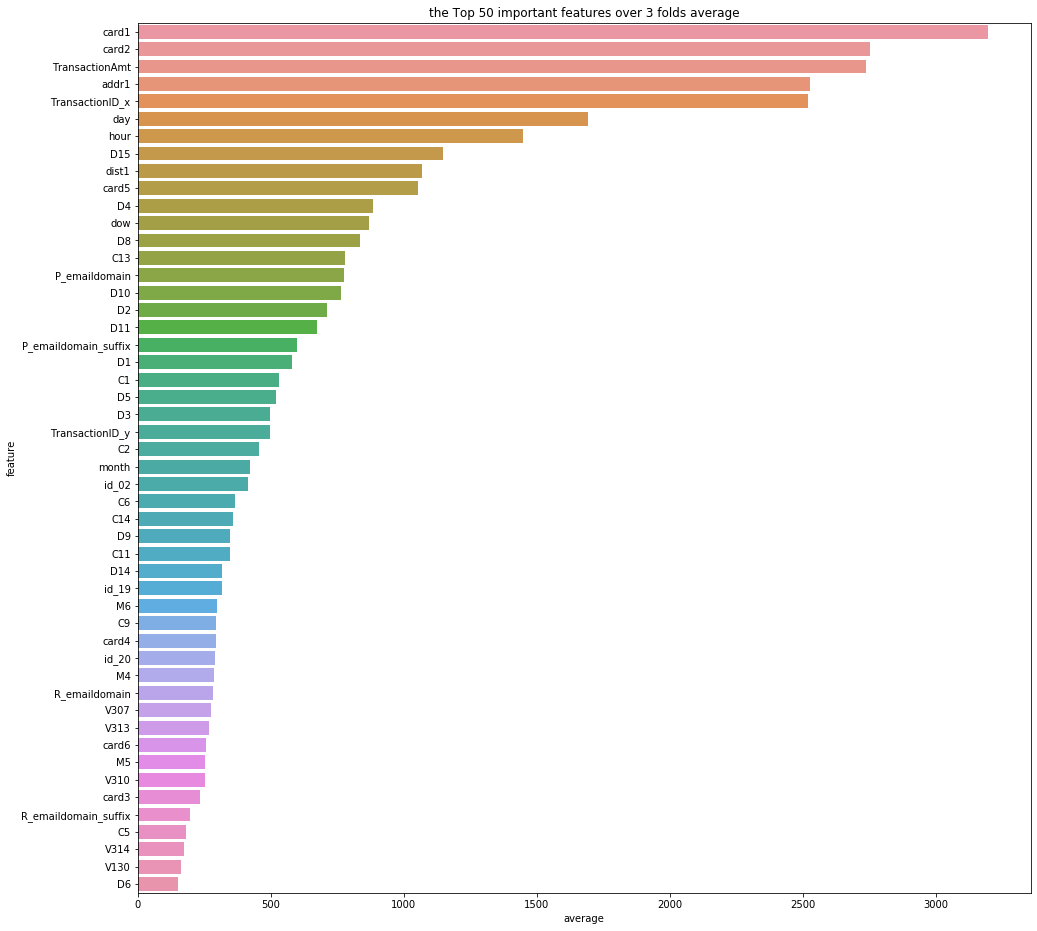

In [74]:
feature_importances['average'] = feature_importances[[f'fold_{fold_n + 1}' for fold_n in range(folds.n_splits)]].mean(axis=1)
feature_importances.to_csv('feature_importances.csv')

plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature');
plt.title(f'the Top 50 important features over {n_folds} folds average')

In [75]:
#fit the model with test dataset
y_pred = clf.predict(X_test)

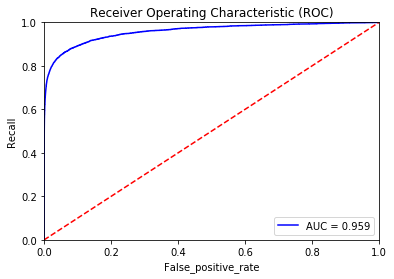

In [76]:
#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('False_positive_rate')
plt.show()

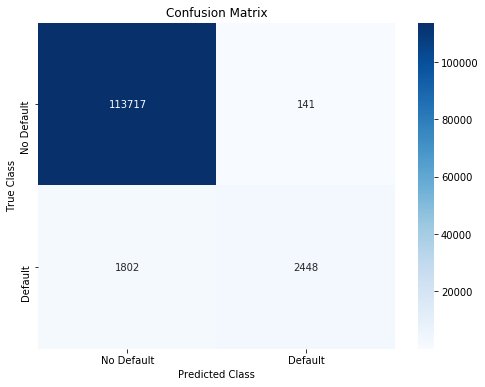

In [77]:
#Print Confusion Matrix
#Set threshold=0.5
cm = confusion_matrix(y_test, y_pred.round())
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [78]:
#Set threshold=0.5confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred.round()).ravel()
fpr = (fp/(fp+tn))
precision = precision_score(y_test, y_pred.round())
print(f'False_positive_rate: {fpr}')
print(f'Precision(positive predictive value):{precision}')

False_positive_rate: 0.0012383846545697271
Precision(positive predictive value):0.9455388180764774


After the feature engineering, the AUC has no change. While the new created features as “day”, “hour”,  “dow” are the top features. Thus, we will try a second feature engineering.

####  The second Feature Engineering
According to the important features in the previous model, create new features by combining the top important features(card1, card2, TransactionAmt, addr1,D15)

In [79]:
def Advanced_features(df):

    # since card1 and card2 are the top2 features, create a new feature card_id 
    cards_list= ['card1', 'card2', 'card3', 'card5']
    for card in cards_list: 
        if '1' in card: 
            df['card_id']= df[card].map(str)
        else : 
            df['card_id']+= ' '+df[card].map(str)
       
    #formating this new feature
    def corret_card_id(x): 
        x=x.replace('.0','')
        x=x.replace('-999','nan')
        return x   
    
    df['card_id']=df['card_id'].apply(corret_card_id)
    
    # New feature - decimal part of the transaction amount.
    df['TransactionAmt_decimal'] = ((df['TransactionAmt'] - df['TransactionAmt'].astype(int)) * 1000).astype(int)
        
    
    # Built new features with importance features (TransactionAmt, card1, card2, addrs1, D15)       
    df['TransactionAmt_to_mean_card1'] = df['TransactionAmt'] / df.groupby(['card1'])['TransactionAmt'].transform('mean')
    df['TransactionAmt_to_mean_card2'] = df['TransactionAmt'] / df.groupby(['card2'])['TransactionAmt'].transform('mean')
    df['TransactionAmt_to_mean_addr1'] = df['TransactionAmt'] / df.groupby(['addr1'])['TransactionAmt'].transform('mean')
    df['TransactionAmt_to_std_card1'] = df['TransactionAmt'] / df.groupby(['card1'])['TransactionAmt'].transform('std')
    df['TransactionAmt_to_std_card2'] = df['TransactionAmt'] / df.groupby(['card2'])['TransactionAmt'].transform('std')
    df['TransactionAmt_to_std_addr1'] = df['TransactionAmt'] / df.groupby(['addr1'])['TransactionAmt'].transform('std')

    
    df['D15_to_mean_card1'] = df['D15'] / df.groupby(['card1'])['D15'].transform('mean')
    df['D15_to_mean_card2'] = df['D15'] / df.groupby(['card2'])['D15'].transform('mean')
    df['D15_to_mean_addr1'] = df['D15'] / df.groupby(['addr1'])['D15'].transform('mean')
    df['D15_to_std_card1'] = df['D15'] / df.groupby(['card1'])['D15'].transform('std')
    df['D15_to_std_card2'] = df['D15'] / df.groupby(['card2'])['D15'].transform('std')
    df['D15_to_std_addr1'] = df['D15'] / df.groupby(['addr1'])['D15'].transform('std')
    
    return df

In [80]:
fe_train_df2 = Advanced_features(fe_train_df)

In [81]:
#LightGBM is not compatible with “Object” type with pandas DataFrame, 
#LableEncoder can avoid the error for LightBGM for string datatype
for col in fe_train_df2.columns:
    if fe_train_df2[col].dtype == 'object':
        le = LabelEncoder()
        le.fit(list(fe_train_df2[col].astype(str).values))
        fe_train_df2[col] = le.transform(list(fe_train_df2[col].astype(str).values))

In [82]:
#Due to the error of "Did not expect the data types in fields TransactionDT"
X = fe_train_df2.sort_values('TransactionDT').drop(['isFraud', 'TransactionDT'], axis=1)
y = fe_train_df2.sort_values('TransactionDT')['isFraud']

X_new, X_test, y_new, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [83]:
%%time

n_folds = 3
folds = KFold(n_splits=n_folds)

columns = X_new.columns
splits = folds.split(X_new, y_new)
y_preds = np.zeros(X_test.shape[0])
y_oof = np.zeros(X_new.shape[0])
score = 0

feature_importances = pd.DataFrame()
feature_importances['feature'] = columns
  
for fold_n, (train_index, valid_index) in enumerate(splits):
    X_train, X_valid = X_new[columns].iloc[train_index], X_new[columns].iloc[valid_index]
    y_train, y_valid = y_new.iloc[train_index], y_new.iloc[valid_index]
    
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_valid, label=y_valid)

    clf = lgb.train(params, dtrain, valid_sets = [dtrain, dvalid], early_stopping_rounds=10)
    
    feature_importances[f'fold_{fold_n + 1}'] = clf.feature_importance()
    
    y_pred_valid = clf.predict(X_valid)
    y_oof[valid_index] = y_pred_valid
    print(f"Fold {fold_n + 1} | AUC: {roc_auc_score(y_valid, y_pred_valid)}")
    
    score += roc_auc_score(y_valid, y_pred_valid) / n_folds
    y_preds += clf.predict(X_test) / n_folds
    
    del X_train, X_valid, y_train, y_valid
    gc.collect()
    
print(f"\nMean AUC = {score}")

[1]	training's auc: 0.896449	valid_1's auc: 0.86657
Training until validation scores don't improve for 10 rounds.
[2]	training's auc: 0.907017	valid_1's auc: 0.884963
[3]	training's auc: 0.913902	valid_1's auc: 0.890757
[4]	training's auc: 0.920846	valid_1's auc: 0.896582
[5]	training's auc: 0.924455	valid_1's auc: 0.900066
[6]	training's auc: 0.931939	valid_1's auc: 0.904496
[7]	training's auc: 0.937339	valid_1's auc: 0.908802
[8]	training's auc: 0.940904	valid_1's auc: 0.910543
[9]	training's auc: 0.944377	valid_1's auc: 0.912973
[10]	training's auc: 0.946517	valid_1's auc: 0.91414
[11]	training's auc: 0.950016	valid_1's auc: 0.916417
[12]	training's auc: 0.952367	valid_1's auc: 0.91798
[13]	training's auc: 0.954297	valid_1's auc: 0.919032
[14]	training's auc: 0.958119	valid_1's auc: 0.921799
[15]	training's auc: 0.960992	valid_1's auc: 0.923389
[16]	training's auc: 0.962985	valid_1's auc: 0.924809
[17]	training's auc: 0.965771	valid_1's auc: 0.926237
[18]	training's auc: 0.968233	va

[49]	training's auc: 0.999091	valid_1's auc: 0.954091
[50]	training's auc: 0.999206	valid_1's auc: 0.954379
[51]	training's auc: 0.999313	valid_1's auc: 0.95449
[52]	training's auc: 0.999379	valid_1's auc: 0.954673
[53]	training's auc: 0.999433	valid_1's auc: 0.954808
[54]	training's auc: 0.999485	valid_1's auc: 0.954988
[55]	training's auc: 0.999556	valid_1's auc: 0.95507
[56]	training's auc: 0.99962	valid_1's auc: 0.955237
[57]	training's auc: 0.999647	valid_1's auc: 0.955804
[58]	training's auc: 0.999708	valid_1's auc: 0.95609
[59]	training's auc: 0.99975	valid_1's auc: 0.956232
[60]	training's auc: 0.999778	valid_1's auc: 0.956477
[61]	training's auc: 0.999803	valid_1's auc: 0.956677
[62]	training's auc: 0.999834	valid_1's auc: 0.956842
[63]	training's auc: 0.999851	valid_1's auc: 0.956946
[64]	training's auc: 0.999868	valid_1's auc: 0.957128
[65]	training's auc: 0.999886	valid_1's auc: 0.957175
[66]	training's auc: 0.999903	valid_1's auc: 0.957302
[67]	training's auc: 0.999916	val

[98]	training's auc: 0.999999	valid_1's auc: 0.956821
[99]	training's auc: 0.999999	valid_1's auc: 0.956892
[100]	training's auc: 1	valid_1's auc: 0.95682
Did not meet early stopping. Best iteration is:
[100]	training's auc: 1	valid_1's auc: 0.95682
Fold 3 | AUC: 0.9568196079235188

Mean AUC = 0.9598235874779104
CPU times: user 25min 15s, sys: 1min 7s, total: 26min 22s
Wall time: 8min 13s


Text(0.5, 1.0, 'the Top 50 important features over 3 folds average with improved model')

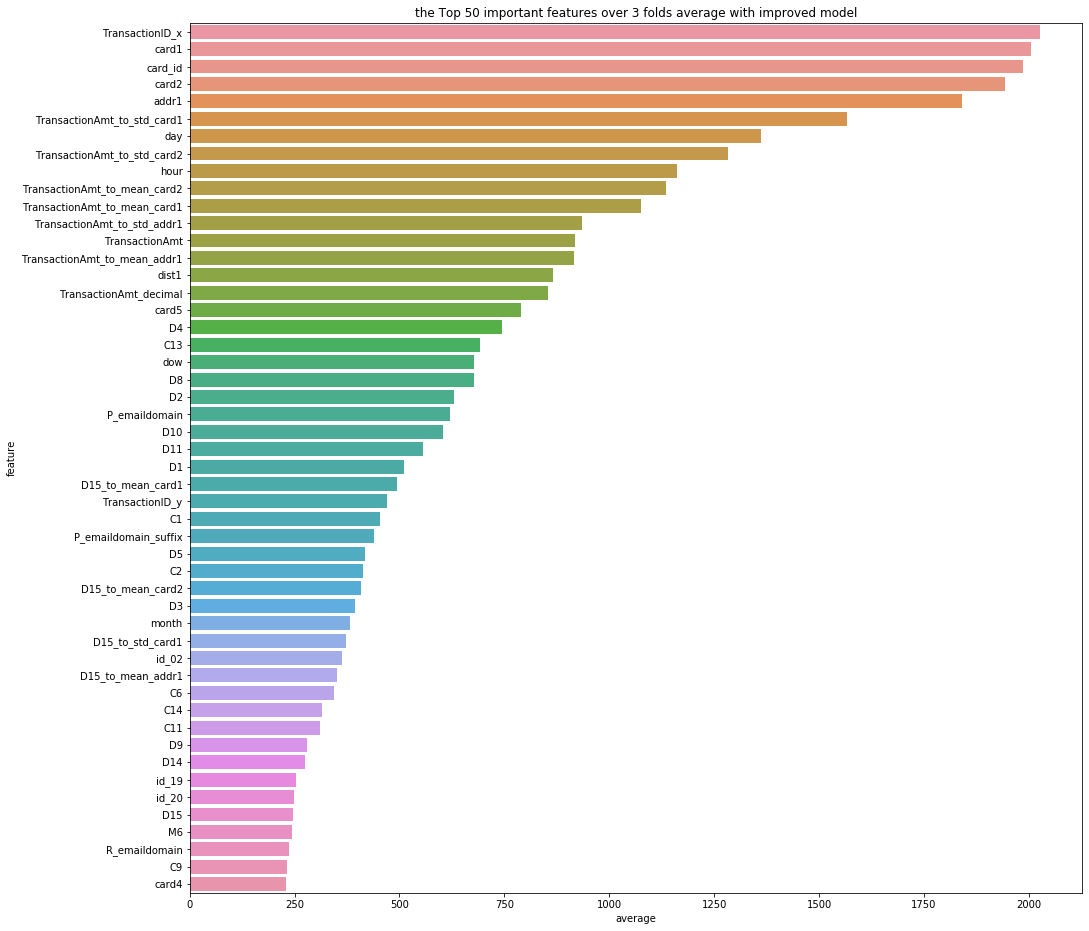

In [84]:
feature_importances['average'] = feature_importances[[f'fold_{fold_n + 1}' for fold_n in range(folds.n_splits)]].mean(axis=1)
feature_importances.to_csv('feature_importances.csv')

plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature');
plt.title(f'the Top 50 important features over {n_folds} folds average with improved model')

In [85]:
#fit the model with test dataset
y_pred = clf.predict(X_test)

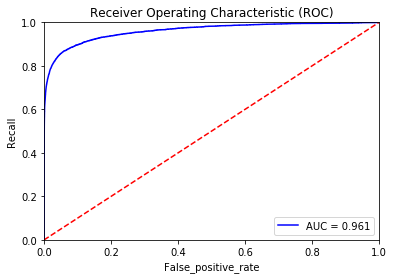

In [86]:
#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('False_positive_rate')
plt.show()

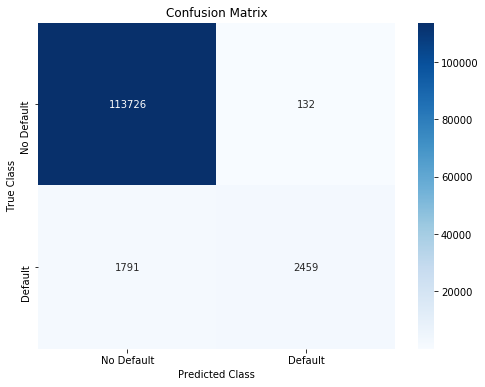

In [87]:
#Print Confusion Matrix
#Set threshold=0.5
cm = confusion_matrix(y_test, y_pred.round())
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [130]:
#Set threshold=0.5confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred.round()).ravel()
fpr = (fp/(fp+tn))
recall = tp/(tp+fn)
precision = precision_score(y_test, y_pred.round())
print(f'False_positive_rate: {fpr}')
print(f'Precision(positive predictive value):{precision}')
print(f'Recall:{recall}')

False_positive_rate: 0.0011593388255546383
Precision(positive predictive value):0.949054419143188
Recall:0.5785882352941176


After the 2nd feature engineering, the AUC is a little increase to 0.961. While in top 20 features, 11 of the features are the new created features by our feature engineering.

## F) Results and Discussion

In this project, the feature engineering is an important part of the job. After EDA, cleaning&wrangling data, three different models were used to fit the data. And LightGBM is choosen as the final model.

After optimising several important parameters and conducting feature engineering, the AUC score for test data reached 0.961 with a very low false positive rate as 0.00116.

While there still have some issues need to be discussed:
- The balance of fn and fp
- Reduce the features
- Dataset without identity file information

#### The balance of fn and fp

The issue of this problem:
According to the confusion matrix, the recall is little low just 0.5786, which means only 57.86% of total real frauds have been detected in this model. To deal with this problem, we can reduce our threshold to 0.4. 
The balance of fn and fp is important. If the company prefers to reduce money loss from detection, so the fn should be low. If the company wants improve customer experience, so the fp should be reduced.  

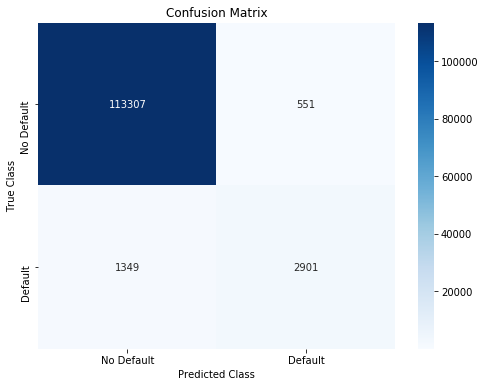

In [135]:
#Set threshold=0.2

y_pred_2 = np.where(y_pred <0.2, 0, 1)
cm = confusion_matrix(y_test, y_pred_2)
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [136]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_2).ravel()
fpr = (fp/(fp+tn))
recall = tp/(tp+fn)
precision = precision_score(y_test, y_pred_2)
print(f'False_positive_rate: {fpr}')
print(f'Precision(positive predictive value):{precision}')
print(f'Recall:{recall}')

False_positive_rate: 0.004839361309701558
Precision(positive predictive value):0.8403823870220162
Recall:0.6825882352941176


when threshold dropped to 0.2, the recall score is increased to 0.6826, while the precision decreased with a higher false positive rate

#### Dataset without identity file information
Since the model has a very high AUC score before feature engineering, it may cause by including the file named "train_identity" which contains the information from collected by Vesta’s fraud protection system and digital security partners. 
Thus, we can fit this model with the dataset only from "train_transaction" file to check the performance.

During the feature engineering, the involved the columns are "TransactionDT", "TransactionAmt", "P_emaildomain", "R_emaildomain" ,"card1", "card2", "adress1" and "D15", which are all belonged to "train_transaction" file. Thus, we just need to delete the columns from ""train_identity" files.

In [139]:
#  import data from "train_identity.csv" get the columns' name
train_identity = pd.read_csv('Capstone/train_identity.csv')
drop_cols_list = train_identity.columns
transaction_df = fe_train_df2.copy()

In [140]:
# drop the features in indentity.csv
for col in transaction_df.columns:
    if col in drop_cols_list:
        del transaction_df[col]
        
display(transaction_df.head())

,TransactionID_x,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,TransactionAmt_to_mean_addr1,TransactionAmt_to_std_card1,TransactionAmt_to_std_card2,TransactionAmt_to_std_addr1,D15_to_mean_card1,D15_to_mean_card2,D15_to_mean_addr1,D15_to_std_card1,D15_to_std_card2,D15_to_std_addr1
0,2987000,0,2017-12-02 00:00:00,68.5,4,13926,NaN,150.0,1,142.0,...,0.509556,0.184566,NaN,0.286941,0.000000,NaN,0.000000,0.000000,NaN,0.000000
1,2987001,0,2017-12-02 00:00:01,29.0,4,2755,404.0,150.0,2,102.0,...,0.186032,0.062995,0.079737,0.116132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2987002,0,2017-12-02 00:01:09,59.0,4,4663,490.0,150.0,4,166.0,...,0.445765,0.589241,0.281929,0.254240,2.518583,1.562776,1.611525,1.851016,1.468884,1.486472
3,2987003,0,2017-12-02 00:01:39,50.0,4,18132,567.0,150.0,2,117.0,...,0.368830,0.259447,0.229218,0.235658,0.550272,0.575917,0.686169,0.520531,0.528243,0.576638
4,2987004,0,2017-12-02 00:01:46,50.0,1,4497,514.0,150.0,2,102.0,...,0.306863,0.882933,0.094138,0.185845,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
del train_identity
gc.collect()

10180

In [142]:
#Due to the error of "Did not expect the data types in fields TransactionDT"
X = transaction_df.sort_values('TransactionDT').drop(['isFraud', 'TransactionDT'], axis=1)
y = transaction_df.sort_values('TransactionDT')['isFraud']

X_new, X_test, y_new, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [143]:
%%time

n_folds = 3
folds = KFold(n_splits=n_folds)

columns = X_new.columns
splits = folds.split(X_new, y_new)
y_preds = np.zeros(X_test.shape[0])
y_oof = np.zeros(X_new.shape[0])
score = 0

feature_importances2 = pd.DataFrame()
feature_importances2['feature'] = columns
  
for fold_n, (train_index, valid_index) in enumerate(splits):
    X_train, X_valid = X_new[columns].iloc[train_index], X_new[columns].iloc[valid_index]
    y_train, y_valid = y_new.iloc[train_index], y_new.iloc[valid_index]
    
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_valid, label=y_valid)

    clf = lgb.train(params, dtrain, valid_sets = [dtrain, dvalid], early_stopping_rounds=10)
    
    feature_importances2[f'fold_{fold_n + 1}'] = clf.feature_importance()
    
    y_pred_valid = clf.predict(X_valid)
    y_oof[valid_index] = y_pred_valid
    print(f"Fold {fold_n + 1} | AUC: {roc_auc_score(y_valid, y_pred_valid)}")
    
    score += roc_auc_score(y_valid, y_pred_valid) / n_folds
    y_preds += clf.predict(X_test) / n_folds
    
    del X_train, X_valid, y_train, y_valid
    gc.collect()
    
print(f"\nMean AUC = {score}")

[1]	training's auc: 0.896484	valid_1's auc: 0.866451
Training until validation scores don't improve for 10 rounds.
[2]	training's auc: 0.906954	valid_1's auc: 0.884671
[3]	training's auc: 0.915065	valid_1's auc: 0.893626
[4]	training's auc: 0.921246	valid_1's auc: 0.897576
[5]	training's auc: 0.92558	valid_1's auc: 0.901494
[6]	training's auc: 0.93201	valid_1's auc: 0.905088
[7]	training's auc: 0.937493	valid_1's auc: 0.908588
[8]	training's auc: 0.941461	valid_1's auc: 0.911587
[9]	training's auc: 0.944819	valid_1's auc: 0.913697
[10]	training's auc: 0.946798	valid_1's auc: 0.915388
[11]	training's auc: 0.950004	valid_1's auc: 0.916813
[12]	training's auc: 0.952633	valid_1's auc: 0.91754
[13]	training's auc: 0.954279	valid_1's auc: 0.918344
[14]	training's auc: 0.957121	valid_1's auc: 0.919526
[15]	training's auc: 0.959533	valid_1's auc: 0.920921
[16]	training's auc: 0.962497	valid_1's auc: 0.922501
[17]	training's auc: 0.96576	valid_1's auc: 0.924794
[18]	training's auc: 0.967594	val

[49]	training's auc: 0.998953	valid_1's auc: 0.955419
[50]	training's auc: 0.999047	valid_1's auc: 0.955737
[51]	training's auc: 0.999115	valid_1's auc: 0.955989
[52]	training's auc: 0.999236	valid_1's auc: 0.9562
[53]	training's auc: 0.999331	valid_1's auc: 0.956334
[54]	training's auc: 0.999446	valid_1's auc: 0.95651
[55]	training's auc: 0.999525	valid_1's auc: 0.956617
[56]	training's auc: 0.99957	valid_1's auc: 0.956792
[57]	training's auc: 0.999625	valid_1's auc: 0.957114
[58]	training's auc: 0.999667	valid_1's auc: 0.957215
[59]	training's auc: 0.99971	valid_1's auc: 0.957223
[60]	training's auc: 0.999752	valid_1's auc: 0.957331
[61]	training's auc: 0.999778	valid_1's auc: 0.957491
[62]	training's auc: 0.999811	valid_1's auc: 0.957735
[63]	training's auc: 0.999825	valid_1's auc: 0.958013
[64]	training's auc: 0.999843	valid_1's auc: 0.958017
[65]	training's auc: 0.999862	valid_1's auc: 0.958201
[66]	training's auc: 0.999879	valid_1's auc: 0.958335
[67]	training's auc: 0.999897	val

[98]	training's auc: 1	valid_1's auc: 0.955802
[99]	training's auc: 1	valid_1's auc: 0.955981
[100]	training's auc: 1	valid_1's auc: 0.956099
Did not meet early stopping. Best iteration is:
[100]	training's auc: 1	valid_1's auc: 0.956099
Fold 3 | AUC: 0.9560985079788091

Mean AUC = 0.9598783716715447
CPU times: user 24min 35s, sys: 1min 25s, total: 26min 1s
Wall time: 9min 52s


In [144]:
#fit the model with test dataset
y_pred = clf.predict(X_test)

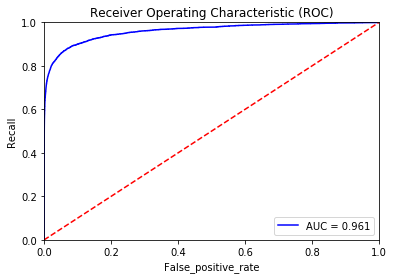

In [145]:
#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('False_positive_rate')
plt.show()

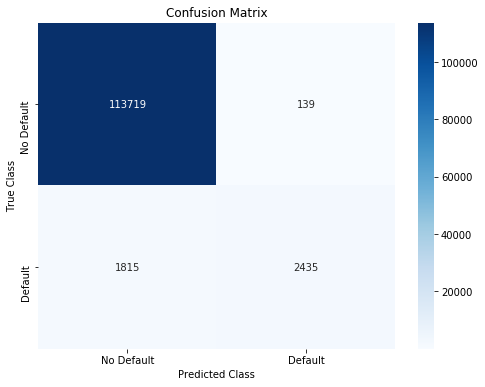

In [146]:
#Print Confusion Matrix
#Set threshold=0.5
cm = confusion_matrix(y_test, y_pred.round())
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [147]:
#Set threshold=0.5confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred.round()).ravel()
fpr = (fp/(fp+tn))
recall = tp/(tp+fn)
precision = precision_score(y_test, y_pred.round())
print(f'False_positive_rate: {fpr}')
print(f'Precision(positive predictive value):{precision}')
print(f'Recall:{recall}')

False_positive_rate: 0.0012208189147885963
Precision(positive predictive value):0.945998445998446
Recall:0.5729411764705883


From the above resluts, we can find there is no change in AUC score and a little difference in confusion matrix. It seems that the data in "train_identity" file nearly has no influence to our model.

#### Reduce the features - delete the features with low importance.

The feature_importance in this project is mesured by the numbers of times the feature is used in a model to split.
We will selected top 100 features as selected feature. To check the model score and running time.

In [158]:
selected_features = feature_importances.sort_values(by='average', ascending=False).head(100)
selected_features =selected_features["feature"]
selected_features = selected_features.values.tolist()
selected_features.append("isFraud")
reduce_features_df = pd.DataFrame()

In [159]:
# select the features 
for col in fe_train_df2.columns:
    if col in selected_features:
        reduce_features_df[col] = fe_train_df2[col]
        
display(reduce_features_df.head())

,TransactionID_x,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,TransactionAmt_to_mean_addr1,TransactionAmt_to_std_card1,TransactionAmt_to_std_card2,TransactionAmt_to_std_addr1,D15_to_mean_card1,D15_to_mean_card2,D15_to_mean_addr1,D15_to_std_card1,D15_to_std_card2,D15_to_std_addr1
0,2987000,0,68.5,4,13926,NaN,150.0,1,142.0,1,...,0.509556,0.184566,NaN,0.286941,0.000000,NaN,0.000000,0.000000,NaN,0.000000
1,2987001,0,29.0,4,2755,404.0,150.0,2,102.0,1,...,0.186032,0.062995,0.079737,0.116132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2987002,0,59.0,4,4663,490.0,150.0,4,166.0,2,...,0.445765,0.589241,0.281929,0.254240,2.518583,1.562776,1.611525,1.851016,1.468884,1.486472
3,2987003,0,50.0,4,18132,567.0,150.0,2,117.0,2,...,0.368830,0.259447,0.229218,0.235658,0.550272,0.575917,0.686169,0.520531,0.528243,0.576638
4,2987004,0,50.0,1,4497,514.0,150.0,2,102.0,1,...,0.306863,0.882933,0.094138,0.185845,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
#Due to the error of "Did not expect the data types in fields TransactionDT"
X = reduce_features_df.drop(['isFraud'], axis=1)
y = reduce_features_df['isFraud']

X_new, X_test, y_new, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [162]:
%%time

n_folds = 3
folds = KFold(n_splits=n_folds)

columns = X_new.columns
splits = folds.split(X_new, y_new)
y_preds = np.zeros(X_test.shape[0])
y_oof = np.zeros(X_new.shape[0])
score = 0

feature_importances = pd.DataFrame()
feature_importances['feature'] = columns
  
for fold_n, (train_index, valid_index) in enumerate(splits):
    X_train, X_valid = X_new[columns].iloc[train_index], X_new[columns].iloc[valid_index]
    y_train, y_valid = y_new.iloc[train_index], y_new.iloc[valid_index]
    
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_valid, label=y_valid)

    clf = lgb.train(params, dtrain, valid_sets = [dtrain, dvalid], early_stopping_rounds=10)
    
    feature_importances[f'fold_{fold_n + 1}'] = clf.feature_importance()
    
    y_pred_valid = clf.predict(X_valid)
    y_oof[valid_index] = y_pred_valid
    print(f"Fold {fold_n + 1} | AUC: {roc_auc_score(y_valid, y_pred_valid)}")
    
    score += roc_auc_score(y_valid, y_pred_valid) / n_folds
    y_preds += clf.predict(X_test) / n_folds
    
    del X_train, X_valid, y_train, y_valid
    gc.collect()
    
print(f"\nMean AUC = {score}")

[1]	training's auc: 0.891851	valid_1's auc: 0.872238
Training until validation scores don't improve for 10 rounds.
[2]	training's auc: 0.904686	valid_1's auc: 0.884604
[3]	training's auc: 0.910918	valid_1's auc: 0.891652
[4]	training's auc: 0.918551	valid_1's auc: 0.89762
[5]	training's auc: 0.922224	valid_1's auc: 0.898947
[6]	training's auc: 0.92831	valid_1's auc: 0.902094
[7]	training's auc: 0.931108	valid_1's auc: 0.903893
[8]	training's auc: 0.936688	valid_1's auc: 0.907503
[9]	training's auc: 0.941234	valid_1's auc: 0.910985
[10]	training's auc: 0.945993	valid_1's auc: 0.914735
[11]	training's auc: 0.950641	valid_1's auc: 0.916769
[12]	training's auc: 0.953238	valid_1's auc: 0.919096
[13]	training's auc: 0.956552	valid_1's auc: 0.920599
[14]	training's auc: 0.958755	valid_1's auc: 0.922288
[15]	training's auc: 0.961458	valid_1's auc: 0.923853
[16]	training's auc: 0.963637	valid_1's auc: 0.924968
[17]	training's auc: 0.96572	valid_1's auc: 0.92598
[18]	training's auc: 0.968226	val

[49]	training's auc: 0.999054	valid_1's auc: 0.95311
[50]	training's auc: 0.999174	valid_1's auc: 0.953232
[51]	training's auc: 0.999269	valid_1's auc: 0.953573
[52]	training's auc: 0.999343	valid_1's auc: 0.953893
[53]	training's auc: 0.999394	valid_1's auc: 0.95407
[54]	training's auc: 0.999453	valid_1's auc: 0.954187
[55]	training's auc: 0.999514	valid_1's auc: 0.954413
[56]	training's auc: 0.999574	valid_1's auc: 0.954488
[57]	training's auc: 0.999626	valid_1's auc: 0.954869
[58]	training's auc: 0.999682	valid_1's auc: 0.954998
[59]	training's auc: 0.99971	valid_1's auc: 0.955148
[60]	training's auc: 0.999731	valid_1's auc: 0.955427
[61]	training's auc: 0.999763	valid_1's auc: 0.955593
[62]	training's auc: 0.999778	valid_1's auc: 0.956065
[63]	training's auc: 0.999801	valid_1's auc: 0.956351
[64]	training's auc: 0.999831	valid_1's auc: 0.956505
[65]	training's auc: 0.999852	valid_1's auc: 0.956775
[66]	training's auc: 0.999871	valid_1's auc: 0.956867
[67]	training's auc: 0.999889	v

[99]	training's auc: 0.999999	valid_1's auc: 0.955254
[100]	training's auc: 0.999999	valid_1's auc: 0.955308
Did not meet early stopping. Best iteration is:
[100]	training's auc: 0.999999	valid_1's auc: 0.955308
Fold 3 | AUC: 0.9553079876718285

Mean AUC = 0.9584136217888621
CPU times: user 9min 42s, sys: 20.9 s, total: 10min 3s
Wall time: 3min 21s


In [164]:
#fit the model with test dataset
y_pred = clf.predict(X_test)

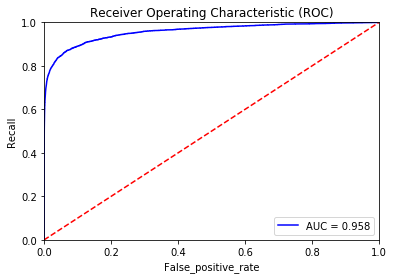

In [165]:
#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('False_positive_rate')
plt.show()

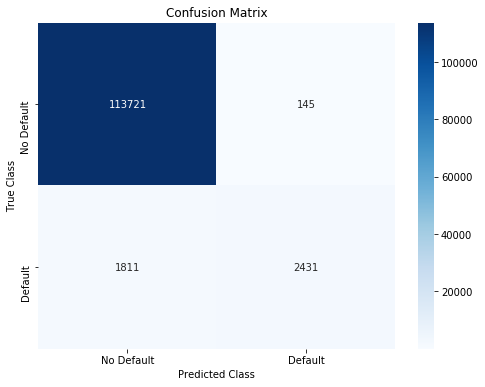

In [166]:
#Print Confusion Matrix
#Set threshold=0.5
cm = confusion_matrix(y_test, y_pred.round())
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [167]:
#Set threshold=0.5confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred.round()).ravel()
fpr = (fp/(fp+tn))
recall = tp/(tp+fn)
precision = precision_score(y_test, y_pred.round())
print(f'False_positive_rate: {fpr}')
print(f'Precision(positive predictive value):{precision}')
print(f'Recall:{recall}')

False_positive_rate: 0.001273426659406671
Precision(positive predictive value):0.9437111801242236
Recall:0.5730787364450731


With only 100 features, the computation time of this model is much faster with a little lower AUC score.